<a href="https://colab.research.google.com/github/teobenko99/PRACTICA/blob/main/TP_Final_Aprendizaje_Autom%C3%A1tico_vers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Set-up opcional para Google Colab
# Si usás Colab, podés montar Drive y/o instalar dependencias opcionales.
USE_COLAB = True  # Cambiá a True si querés montar Drive automáticamente. Lo cambié para cargar los datos

try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB and USE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    # !pip -q install openpyxl
    print("Colab listo. Drive montado.")
else:
    print("Ejecución local o Colab sin montaje de Drive.")


Mounted at /content/drive
Colab listo. Drive montado.


In [ ]:
#Cargas
import pandas as pd
import numpy as np
from pathlib import Path


# Opcional, pero recomendado para la imputación
from sklearn.impute import SimpleImputer

# Definición de la función
def load_data():
    candidates = [
        Path('/content/datos_genero_filtrados.xlsx'),   # Colab local
        Path('data/raw/datos_genero_filtrados.xlsx'),   # Proyecto local
        Path('datos_genero_filtrados.xlsx'),            # Carpeta actual
    ]
    for p in candidates:
        if p.exists():
            df = pd.read_excel(p)
            print("=== Dataset cargado ===")
            print(f"Archivo: {p} | Filas={df.shape[0]} | Columnas={df.shape[1]}")
            display(df.head(3))
            return df
    raise FileNotFoundError('No se encontró datos_genero_filtrados.xlsx en rutas conocidas.')

#ver DS cargado
df = load_data()  # Llama a la función y guarda el DataFrame en 'df'


=== Dataset cargado ===
Archivo: /content/datos_genero_filtrados.xlsx | Filas=235 | Columnas=36


,profesionales,edad,motivo_de_consulta,medio_por_el_que_ingresa,genero,nacionalidad,barrio,municipio,localidad,estado_civil,...,simbolica,ambiental,politica,digital,cant_tipos_violencias_por_persona,denuncio,medidas_de_proteccion,fecha_fin_de_vigencia,personas_a_cargo,red_vincular
0,Fanny / Dana,28.0,VIOLENCIA,NaN,Mujer,Argentina,bordeu,Bahía Blanca,Bahía Blanca,Soltera,...,0.0,0.0,0.0,0.0,2.0,NO,NO,NaN,NO,PARIENTES CONVIVIENTES
1,Agus/ Analé,43.0,VIOLENCIA,NaN,Mujer,Argentina,pacifico,Bahía Blanca,Bahía Blanca,NaN,...,0.0,1.0,0.0,0.0,4.0,SI,Prohibición de acercamiento,NaN,Hija/Hijo,PARIENTES NO CONVIVIENTES
2,Fanny/ Majo,53.0,VIOLENCIA,NaN,Mujer,Argentina,pampa central,Bahía Blanca,Bahía Blanca,Soltera,...,0.0,0.0,0.0,0.0,2.0,NO,NO,NaN,NO,PARIENTES NO CONVIVIENTES


In [ ]:
import matplotlib.pyplot as plt


# Universidad Nacional de la Matanza

Especialización en Ciencia de Datos

Materia: APRENDIZAJE AUTOMÁTICO

GRUPO : Benko Teo, Cura Diego, Riganti Valentina, Sanjuan Oriana.

---

##Objetivo
Implementar un sistema de alertas tempranas en la Dirección de Género de Bahía Blanca, que prediga quiénes tienen mayor probabilidad de no denunciar formalmente a través de los canales correspondientes (Comisaría de la Mujer y UFI).  

---

##Revisión de Antecedentes (Similitudes y Experiencias Previas)

Luego de realizar una investigación sobre similitudes del proyecto que se va a encarar y posibles experiencias previas, se pueden dividir los antecedentes existentes en distintas categorías:

**1. Guías y herramientas de detección temprana — Argentina (Ministerio/Estado):** Hay materiales técnicos nacionales que promueven la identificación de señales tempranas de violencias por motivos de género (herramientas para detectar indicadores y diseñar intervenciones preventivas). No están automatizadas.

**2. Proyectos de dispositivo y monitoreo (ej. “Dispositivo MARIANA”) en Argentina:** existen desarrollos tecnológicos y dispositivos pensados como sistemas de alerta para prevención de femicidios/alertas a potenciales víctimas; muestran interés en soluciones tecnológicas. No están implementadas.

**3. Aplicación de Machine Learning para violencia de género en investigaciones académicas:** en la literatura reciente hay trabajos y mapas sistemáticos sobre el uso de modelos predictivos para identificar riesgo en violencia de pareja y patrones que ayudan a predecir probabilidad de denuncia o riesgo grave (en Argentina hay modelos con AUC elevados reportados en la literatura local). Esto muestra que los enfoques híbridos (reglas + ML) han sido explorados. Los resultados son variados y dependen mucho de la calidad de los datos:

* A) Validación argentina de la Escala de Predicción del Riesgo de Violencia Grave (EPV-R) — AUC ≈ 0.69. (Torres Barbero y Ávalos Ávalos, 2025)

* B) Estudios longitudinales / valoración de riesgo con instrumentos estructurados (SARA / RVD, por K. Arbach y colaboradores) — AUC reportadas en estudios relacionados: 0.63 a 0.89 (varía según instrumento y muestra). (Arbach y Folino, 2020)

* C) Trabajo local con bajo rendimiento (estudio sobre sitio de quemadura relacionado con violencia) — AUC = 0.48. (Cei et al, 2024)

**4. Lineamientos internacionales sobre EWS con enfoque de género (UN / OAS / UN Women):** hay guías metodológicas sobre cómo diseñar sistemas de alerta temprana sensibles al género, enfatizando indicadores adecuados, participación de las mujeres y el diseño de respuestas. Usarlas ayuda a evitar sesgos y errores de protección.

**5. Sistemas nacionales consolidados (ej. VioGén/actualizaciones en España):** existen sistemas nacionales de seguimiento/alerta que centralizan información policial/judicial para valorar riesgo y coordinar protección; sirven como referencia de alcances, limitaciones y riesgos (interoperabilidad, privacidad, errores técnicos).


## Primer Estudio de Viabilidad

El análisis de los antecedentes demuestra que hay documentación técnica y proyectos pilotos tanto en Argentina como internacionalmente que respaldan la viabilidad técnica y la relevancia del proyecto. Asimismo, se pueden enumerar numerosos retos como interoperabilidad, errores, fallos técnicos y consideraciones éticas. Por tal motivo, conviene partir por un piloto local y supervisado, con reglas claras, registro de decisiones y evaluación.


El resumen del análisis de viabilidad se presenta a continuación:


#### Viabilidad Técnica
---

**Alta.** Se reportaron resultados prometedores (AUC hasta 0.89) usando ML en el mismo contexto de valoración de riesgo. La predicción de la no denuncia es un problema clásico de Clasificación.

#### Necesidad / Relevancia
---
**Muy Alta.** El objetivo se alinea directamente con las Guías y Herramientas de Detección Temprana y el interés en Proyectos de Dispositivo y Monitoreo en Argentina.

#### Riesgos Principales
---
**Moderados a Altos (pero manejables).** El desafío no es el algoritmo, sino la calidad, volumen, y sesgos, del dataset. El hecho de que un estudio reportó un AUC de 0.48 subraya que el éxito dependerá críticamente de si los datos trabajados capturan los indicadores correctos de la no denuncia.

#### Condición Clave
---
**Comenzar con un Piloto Local y Supervisado.** Tal como se menciona en el análisis de los antecedentes, esta aproximación permite evaluar la calidad de los datos y los resultados del modelo con reglas claras y registro de decisiones antes de una implementación a gran escala.


## 1. Pre-visualización y Descubrimiento de Datos

El dataset original consta de 39 variables y 235 registros ($N=235$).

Sin embargo, con el fin de proteger los datos personales (al estar trabajando con el entorno público de Colab), se decidió eliminar tres variables que identificaban de manera única a la persona que se comunico para contar su caso. Por lo tanto, incluirlas es un riesgo de privacidad y no ayudan a generalizar el modelo para casos futuros. Las variables son:

* nombre_y_apellido: persona que se comunica
* documento: identificación unica de la persona que se comunica (DNI)
* domicilio: donde vive la persona que se comunica (figura dirección de la vivienda con numeración exacta)


A continuación, se presenta un diccionario para las 36 variables con una descripción breve del dato registrado:

Descriptoras del caso:

* profesionales: a quien se asigna el caso

* motivo_de_consulta

* medio_por_el_que_ingresa

Identificación de radicación (ubicación):

* nacionalidad

* barrio

* municipio

* localidad

Descriptoras generales de la persona que se comunica:

* edad

* genero

Socioeconómicas y de Estatus:

* estado_civil

* nivel_educativo

* situacion_laboral

* percibe_prestacion_estatal

* vivienda

* obra_social

Clínicas, de Riesgo y Familiares:

* diagnostico

* tratamiento

* posee_cud

* cant_personas_a_cargo

* hijos_pea

* convivencia_pea

* modalidad_de_violencia

Tipos de violencia:

* fisica

* psicologica

* sexual

* economica

* simbolica

* ambiental

* politica

* digital

* cant_tipos_violencias_por_persona: suma la cantidad de violencias informadas

Resolución del caso:

* denuncio

Cuestiones tratadas cuando la denuncia SI se efectuó:

* medidas_de_proteccion

* fecha_fin_de_vigencia

* personas_a_cargo

* red_vincular

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   profesionales                      231 non-null    object 
 1   edad                               225 non-null    float64
 2   motivo_de_consulta                 219 non-null    object 
 3   medio_por_el_que_ingresa           188 non-null    object 
 4   genero                             231 non-null    object 
 5   nacionalidad                       229 non-null    object 
 6   barrio                             235 non-null    object 
 7   municipio                          233 non-null    object 
 8   localidad                          234 non-null    object 
 9   estado_civil                       214 non-null    object 
 10  nivel_educativo                    208 non-null    object 
 11  situacion_laboral                  190 non-null    object 

### Análisis de variables

Se procede a analizar las variables del dataset.

#### Análisis de variables de consulta (qué profesional se asignó, cuál es el motivo de la consulta y por qué canal llega):

In [ ]:
# Función para analizar y mostrar la tabla para una variable categórica
def generate_categorical_table(df, column_name):
    # 1. Calcular el Conteo de Valores, incluyendo Nulos (dropna=False)
    counts = df[column_name].value_counts(dropna=False)
    total_rows = len(df)

    # 2. Reemplazar el índice NaN por una etiqueta
    counts.index = counts.index.fillna('Nulo (Sin dato)')

    # 3. Diagrama de tabla
    percentages = (counts / total_rows) * 100
    analysis_df = pd.DataFrame({
        'Conteo': counts,
        'Porcentaje (%)': percentages.round(2)
    }).sort_values(by='Conteo', ascending=False)

    print(f"\n--- Tabla de Conteo de la Variable '{column_name}' (Pre-limpieza) ---")

    # Limitar la salida de la tabla 'profesionales' a las 10 categorías más frecuentes para legibilidad
    if column_name == 'profesionales':
        print(analysis_df.head(10).to_markdown())
    else:
        print(analysis_df.to_markdown())

# Definición de columnas a analizar y generación de tablas:
col_consulta = ['profesionales', 'motivo_de_consulta','medio_por_el_que_ingresa']

for col in col_consulta:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'profesionales' (Pre-limpieza) ---
| profesionales       |   Conteo |   Porcentaje (%) |
|:--------------------|---------:|-----------------:|
| Ana/Gladis          |       11 |             4.68 |
| Analé/Ana           |        5 |             2.13 |
| Fernanda            |        4 |             1.7  |
| Nulo (Sin dato)     |        4 |             1.7  |
| Agus / Rami         |        4 |             1.7  |
| María José/Fernanda |        4 |             1.7  |
| Fernanda/Leandro    |        4 |             1.7  |
| Flor/Ana            |        3 |             1.28 |
| Rami/Ceci           |        3 |             1.28 |
| Alejandra/Fernanda  |        3 |             1.28 |

--- Tabla de Conteo de la Variable 'motivo_de_consulta' (Pre-limpieza) ---
| motivo_de_consulta   |   Conteo |   Porcentaje (%) |
|:---------------------|---------:|-----------------:|
| VIOLENCIA            |      202 |            85.96 |
| Nulo (Sin dato)      |       16 |     

    'profesionales':

La combinación de profesionales posibles que toman los casos es muy grande. Esta variable muestra una dispersión extrema de valores con muy baja frecuencia por categoría, considerando como fueron completados los datos.

Se requiere de una ardua tarea de limpieza para trabajar las inconsistencias ortográficas y tratar de lograr una transformación adecuada de los nombres de las personas que participaron. Ejemplos posibles a encontrar: "Ana/Rami" vs "Ana/Ramiro" vs "Rami.Ana"

La pregunta crucial sería: ¿Podrá el profesional influir en la razón de la denuncia? ¿Tendrá que ver con el trato ofrecido?

Acción: Según lo comentado con la Dirección General de Género, el personal de la primera etapa es administrativo: solo ingresa el caso y brinda un turno con los profesionales indicados. Es decir, la predisposición a denunciar o no, no depende de los profesionales que atienden por lo cual es probable que la limpieza requiera eliminar esta variable.

    'motivo_de_consulta':

Se observa un sesgo claro hacia una única categoría (VIOLENCIA - 86% de los casos).

Acción: Esto sugiere que la variable tendrá poco poder predictivo, ya que casi todos los casos son de la misma clase. Asimismo, se consulta con la Dirección y nos confirman que todos los casos son consultas por situaciones de violencia.  Podría ser un candidato a eliminar en la limpieza.

    'medio_por_el_que_ingresa':

Se refiere al medio por el cual el consultante establece contacto con la Dirección.

El $20\%$ de los datos está ausente o es desconocido, lo cual es significativo. --> se debería unificar con 'sin datos'. Potencialmente hablando, el medio de ingreso 'desconocido' podría estar asociado a la no denuncia, por lo que no conviene eliminarlo.

Acción: agrupar en una única categoría 'Desconocido' a l'Nulo(sin dato) y 'sin datos'.

Casi $60\%$ ingresa por canales de alta formalidad, lo cual muestra cierto sesgo: Notificación judicial ($35.32\%$) o de manera Espontánea ($21.28\%$).

Hay varias categorías con muy baja frecuencia (menos del $2.5\%$), como Unidad Sanitaria, Hospital, Institución educativa. --> podrían agruparse como única clase, junto a 'otra', para que quede un único grupo como 'Otros Canales'.

Acción: tomar decisiones puntuales para los hallazgos encontrados y reducir la cardinalidad a 5-6 categorías estables.

#### Análisis de variables que describen la ubicación de la persona que se comunica:

In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_ubi = ['nacionalidad','barrio','municipio', 'localidad']

for col in col_ubi:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'nacionalidad' (Pre-limpieza) ---
| nacionalidad    |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| Argentina       |      219 |            93.19 |
| Nulo (Sin dato) |        6 |             2.55 |
| S/D             |        5 |             2.13 |
| sin datos       |        2 |             0.85 |
| Chilena         |        2 |             0.85 |
| No              |        1 |             0.43 |

--- Tabla de Conteo de la Variable 'barrio' (Pre-limpieza) ---
| barrio                |   Conteo |   Porcentaje (%) |
|:----------------------|---------:|-----------------:|
| sin datos             |       20 |             8.51 |
| noroeste              |       20 |             8.51 |
| ingeniero white       |       11 |             4.68 |
| centro                |        7 |             2.98 |
| vista alegre          |        6 |             2.55 |
| villa rosas           |        5 |             2.13 |
| spurr           

    'nacionalidad':

Se observa un claro desbalance hacia la clase ARGENTINA - 93% de los casos.

Las categorías S/D, sin datos y Nulo representan un $5.53\%$ del total.

Acción: En la limpieza, se recomienda unificar los registros que no son 'Argentina' en una sola categoría. En segundo lugar, se recomienda transformar la variable en un predictor binario que capture la desviación y maneje el desbalance de clases(ARGENTINA = 1 ; Otro = 0). Esto mantiene la sensibilidad del modelo y previene el overfitting.

    'barrio':

Por un lado, un alto porcentaje ($29.36\%$) es nulo. Por otro lado, hay 99 categorías únicas, lo que dificultaría la estandarización.

La información de barrio puede ser valiosa bajo el contexto de análisis (riesgo geográfico), por lo que se debe buscar la forma de reducir la cantidad de categorías a un número razonable (entre 5 y 10).

Acción: una opción posible para la limpieza es agrupar barrios por alguna característica (ej. distancia al centro, nivel socioeconómico, o zonificación si se consigue un diccionario externo).


    'municipio' y 'localidad'

Aportan información muy similar.

Acción: En la limpieza se deberan corregir errores tipográficos para revelar la verdadera distribución (Ejemplo: bahia blanca vs Bahía Blanca vs bahia Blanca). Esto vuelve a las variables, una vez limpias, poco predictivas, ya que la mayor parte de los casos quedarían en una sola categoría dominante ($97\%$ Bahía Blanca para 'localidad' y $98\%$ para 'municipio').

#### Análisis de variables que describen características de la persona:

In [ ]:
df['edad'].describe()

,edad
count,225.000000
mean,38.248889
std,12.597134
min,17.000000
25%,29.000000
50%,36.000000
75%,45.000000
max,85.000000


In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_gen = ['genero']

for col in col_gen:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'genero' (Pre-limpieza) ---
| genero          |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| Mujer           |      228 |            97.02 |
| Nulo (Sin dato) |        4 |             1.7  |
| sin datos       |        2 |             0.85 |
| Otro            |        1 |             0.43 |


    'edad':

Se encuentran en un rango de personas de 17 a 85 años con una edad media de 38 años y mediana de 36. La mayoría de las personas que se comunican (75%) tienen hasta 45 años.

Acción: se puede intentar clasificar la variable en rangos etarios para disminuir la cardinalidad.  

    'genero':

Se observa un claro desbalance hacia una única categoría (MUJER - 97% de los casos). Esto limita su capacidad predictiva. Sin embargo, al eliminar la variable en la limpieza el modelo podría no distinguir casos destacables de otros géneros, lo que podría ocultar patrones críticos si, por ejemplo, los hombres o las personas trans tienen una probabilidad de no denunciar diferente a la mayoría.

Acción: se podría transformar la variable en un predictor binario que capture la desviación y maneje el desbalance de clases (MUJER = 0 ; Otro = 1). Esto mantiene la sensibilidad del modelo y previene el overfitting.

#### Análisis de variables socioeconómicas y de estatus de la persona:

In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_general = ['estado_civil','nivel_educativo','situacion_laboral','percibe_prestacion_estatal',
'vivienda','obra_social']

for col in col_general:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'estado_civil' (Pre-limpieza) ---
| estado_civil       |   Conteo |   Porcentaje (%) |
|:-------------------|---------:|-----------------:|
| Soltera            |       97 |            41.28 |
| Casada             |       50 |            21.28 |
| Separada           |       33 |            14.04 |
| Nulo (Sin dato)    |       21 |             8.94 |
| Unión Convivencial |       13 |             5.53 |
| Divorciada         |       10 |             4.26 |
| Viuda              |        7 |             2.98 |
| sin datos          |        4 |             1.7  |

--- Tabla de Conteo de la Variable 'nivel_educativo' (Pre-limpieza) ---
| nivel_educativo                    |   Conteo |   Porcentaje (%) |
|:-----------------------------------|---------:|-----------------:|
| Secundario incompleto              |       67 |            28.51 |
| Secundario completo                |       40 |            17.02 |
| Nulo (Sin dato)                    |       27 |  


    'estado_civil':

La mayor parte de los valores son Soltera ($41.28\%$) y Casada ($21.28\%$).

Acciones:

Agrupar nulos ($8.94\%$)/sin datos ($1.70\%$) en una única categoría como 'Desconocido'.

Hay categorías funcionalmente similares posibles de agrupar (Ejemplo: Separada vs Divorciada)

    'nivel_educativo':

Hay muchos errores tipográficos por corregir (Ejemplo: sin datos vs Sin datos vs Nulo (sin datos) / incompletp vs incompleto / Univrtsitario vs Universitario) y categorías minoritarias que pueden agruparse (Ejemplo: incompleto, universitario).

    'situacion_laboral':

Hay muchos errores tipográficos por corregir (Ejemplo: Trabaja formal vs Trabajo formal / No trabaja vs No Trabaja).

Hay categorías funcionalmente similares para agrupar (Ejemplo: No trabaja con Desocupado / todos trabajos registrados/formales vs todos trabajos no registrados/informales).

Acción: Luego de la limpieza, se puede observar qué clase es la mayoritaria y estandatizar las categorías resultantes.

    'percibe_prestacion_estatal':

AUH ($32.77\%$) es la prestación más común.

Acciones:

Agrupar nulos/sin datos en una única categoría.

(nan, S/D) es la categoría mayoritaria ($40\%$) y desde la Dirección indicaron que la ausencia significa que no tiene prestación. Debe imputarse como "No", al igual que "cuota alimentaria" (que no es una prestación sino un derecho de los/as hijos/as de las mujeres consultantes).

Reducir la cardinalidad agrupando las prestaciones poco frecuentes (Ej.:'ALIMENTAR') en 'Otras Prestaciones'.

    'vivienda':

'Propia' ($38.72\%$) y 'Alquilada' ($19.57\%$) son las dominantes.

Acciones:

Agrupar nulos/sin datos en una única categoría. (sin datos, S/D).

Reducir la cardinalidad de clases de muy poca frecuencia o similares en 'Otras'.

    'obra_social':

La mayoría NO posee obra social ($50.64\%$). Los valores nulos significan que no tiene obra social.

Acciones:

Imputar valores nulos como --> NO

Error tipográfico por corregir --> 'No' vs 'no'

Aplicar Codificación One-Hot para crear dos features binarios: SI / NO

#### Análisis de descriptores sobre características Clínicas, de Riesgo y Familiares:

In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_familiar = ['diagnostico','tratamiento','posee_cud','cant_personas_a_cargo',
'hijos_pea','convivencia_pea']

for col in col_familiar:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'diagnostico' (Pre-limpieza) ---
| diagnostico        |   Conteo |   Porcentaje (%) |
|:-------------------|---------:|-----------------:|
| Nulo (Sin dato)    |      126 |            53.62 |
| si                 |       39 |            16.6  |
| no                 |       36 |            15.32 |
| No                 |       30 |            12.77 |
| consum antidep.    |        2 |             0.85 |
| Enfermedad crónica |        1 |             0.43 |
| Opción 1           |        1 |             0.43 |

--- Tabla de Conteo de la Variable 'tratamiento' (Pre-limpieza) ---
| tratamiento     |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| Nulo (Sin dato) |      137 |            58.3  |
| si              |       33 |            14.04 |
| No              |       31 |            13.19 |
| no              |       30 |            12.77 |
| Opción 1        |        2 |             0.85 |
| sin datos       |        2 |     

Las variables analizadas para esta sección tienen varias cosas en común para corregir en la limpieza como errores tipográficos (no vs No) y agrupación de categorías similares como Nulo (Sin dato) y sin datos.

    'diagnostico':

La mayoría ($53.62\%$) son nulos. Si no hay datos, es NO.

Si tiene otros valores como "enfermedad crónica" o "consume antidep.", se considera SI.

Acciones:

Imputar nulos como NO.

Corregir registros (no, No).

El objetivo es identificar si existe o no diagnóstico por lo que la acción recomendada es volver a la variable como binaria. (1 si consum antidep./Enfermedad crónica/si - 0 en todos los otros casos, es decir NO y nulos).

    'tratamiento':

La mayoría ($58.30\%$) son nulos. Si no hay datos, es NO.

Acciones:

Imputar nulos como NO.

Corregir registros (no, No, sin datos).

El objetivo es identificar si existe o no tratamiento (similar a 'diagnostico') por lo que la *acción* recomendada es volver a la variable como binaria. (1 si es SI - 0 en todos los otros casos, es decir NO y nulos).

    'posee_cud':

La mayoría son nulos ( 51.49% ). Si no hay datos, es NO.

Acción recomendada: Evaluación de aplicación Codificación One-Hot para crear dos features binarios: SI / NO.

    'cant_personas_a_cargo':

$36.60\%$ son registros nulos.  Si no hay datos, es NO (es decir, 0 personas a cargo).

Se mezcla el valor categórico 'NO' con los números (cero personas a cargo), por lo que interpeta incorrectamente el tipo de dato como object (deberia ser un entero) --> *acción* recomendada: corregir este mapeo en la limpieza y pasar todo a números.


    'hijos_pea':

La clase 'Si' ($44.26\%$) es la más frecuente, mientras que el $30.64\%$ del total son nulos, es decir, NO.

Acciones recomendadas:

No se observan errores tipográficos.

Imputar nulos a NO.

Evaluación de aplicación Codificación One-Hot para crear dos features binarios: SI / NO.

    'convivencia_pea':

La clase 'NO' ($47.66\%$) es la más frecuente.El $44.68\%$ del total son nulos, es decir, NO.

Acciones recomendadas:

Corregir registros (sin datos).
Imputar nulos a NO.


Evaluación de aplicación Codificación One-Hot para crear dos features binarios: SI / NO

#### Análisis de descriptores de violencia

In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_violencia = ['modalidad_de_violencia','cant_tipos_violencias_por_persona']

for col in col_violencia:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'modalidad_de_violencia' (Pre-limpieza) ---
| modalidad_de_violencia   |   Conteo |   Porcentaje (%) |
|:-------------------------|---------:|-----------------:|
| Doméstica                |      188 |            80    |
| Nulo (Sin dato)          |       46 |            19.57 |
| sin datos                |        1 |             0.43 |

--- Tabla de Conteo de la Variable 'cant_tipos_violencias_por_persona' (Pre-limpieza) ---
| cant_tipos_violencias_por_persona   |   Conteo |   Porcentaje (%) |
|:------------------------------------|---------:|-----------------:|
| Nulo (Sin dato)                     |      205 |            87.23 |
| 2.0                                 |       16 |             6.81 |
| 4.0                                 |        5 |             2.13 |
| 1.0                                 |        5 |             2.13 |
| 3.0                                 |        2 |             0.85 |
| 5.0                                 |     

In [ ]:
df.describe()

,edad,fisica,psicologica,sexual,economica,simbolica,ambiental,politica,digital,cant_tipos_violencias_por_persona
count,225.000000,226.000000,227.000000,227.000000,227.000000,227.000000,224.000000,227.000000,227.000000,30.000000
mean,38.248889,0.513274,0.669604,0.167401,0.264317,0.149780,0.267857,0.004405,0.039648,2.433333
std,12.597134,0.500933,0.471395,0.374158,0.441943,0.357644,0.443835,0.066372,0.195561,1.165106
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,45.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [ ]:
# Definición de columnas a analizar y generación de tablas:
columnas_tipos = ['fisica','psicologica','sexual','economica','simbolica','ambiental',
                  'politica','digital']

for col in columnas_tipos:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'fisica' (Pre-limpieza) ---
| fisica          |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| 1.0             |      116 |            49.36 |
| 0.0             |      110 |            46.81 |
| Nulo (Sin dato) |        9 |             3.83 |

--- Tabla de Conteo de la Variable 'psicologica' (Pre-limpieza) ---
| psicologica     |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| 1.0             |      152 |            64.68 |
| 0.0             |       75 |            31.91 |
| Nulo (Sin dato) |        8 |             3.4  |

--- Tabla de Conteo de la Variable 'sexual' (Pre-limpieza) ---
| sexual          |   Conteo |   Porcentaje (%) |
|:----------------|---------:|-----------------:|
| 0.0             |      189 |            80.43 |
| 1.0             |       38 |            16.17 |
| Nulo (Sin dato) |        8 |             3.4  |

--- Tabla de Conteo de la Variable 'economica' (Pre-

    'modalidad_de_violencia':
La categoría 'Doméstica' domina con el $80\%$ de los registros, por lo que puede sesgar el modelo. Es casi una variable constante.

La información más detallada está en las variables binarias del tipo de violencia (fisica, psicologica, etc.).


*Tipos de violencia:*

Estas variables comparten un % bajo similar de valores nulos (no superan el 5%) y se presentan en formato booleano (Verdadero/Falso). Por lo tanto, hay dos acciones recomendadas posibles para la limpieza:

Convertir Verdadero = 1 ; Falso = 0 (para que sean variables binarias)

Imputar las ausencias / nulos como '0'.

El orden de ocurrencia (verdadero) quedaría así:

    'fisica': Esta balanceada entre V/F (casi 50%)

    'psicologica': Violencia más común (ocurre casi un 65% de las veces)

    'economica': Presencia moderada (un 70% de las veces no ocurre)

    'ambiental': Presencia moderada (casi un 70% de las veces no ocurre)

    'sexual': Presencia baja (un 80% de las veces no ocurre)

    'simbolica': Presencia baja (un 82% de las veces no ocurre)

    'digital': Presencia muy baja (casi un 4% de las veces ocurre)

    'politica': Casi constante a que no ocurra (sucede un 0.43% de las veces)



    'cant_tipos_violencias_por_persona':

La hipótesis es que suma la cantidad de violencias informadas.

Sin embargo, presenta mucha cantidad de nulos (205 registros, es decir, el 87% de los datos), por lo que haremos una verificación adicional en los 30 registros que sí se documento la cantidad.

In [ ]:
# 1. Define the 8 binary violence columns and the count column
violence_cols = [
    'fisica', 'psicologica', 'sexual', 'economica', 'simbolica',
    'ambiental', 'politica', 'digital'
]
count_col = 'cant_tipos_violencias_por_persona'

# 2. Create a temporary DataFrame for cleaning and comparison
df_temp = df.copy()

# 3. Clean and convert binary violence columns (True/False to 1/0, NaN to 0)
for col in violence_cols:
    # Handle the string/boolean values. Map True to 1, False/string 'False' to 0.
    # The value counts showed True/False as strings/bools. Using map is safer.
    df_temp[col] = df_temp[col].map({True: 1, False: 0, 'True': 1, 'False': 0})
    # Fill remaining NaNs (which represent unrecorded/absent violence) with 0
    df_temp[col] = df_temp[col].fillna(0).astype(int)

# 4. Calculate the sum of the cleaned binary columns
df_temp['sum_violencias'] = df_temp[violence_cols].sum(axis=1)

# 5. Clean the recorded count column by converting to numeric (will leave NaNs)
df_temp[count_col] = pd.to_numeric(df_temp[count_col], errors='coerce')

# 6. Compare the two columns only where the recorded count is NOT null
# We only care about the cases where 'cant_tipos_violencias_por_persona' was actually recorded.
comparison_subset = df_temp[df_temp[count_col].notna()]

# 7. Count matches and mismatches
matches = (comparison_subset['sum_violencias'] == comparison_subset[count_col]).sum()
total_recorded = comparison_subset.shape[0]
mismatches = total_recorded - matches

# Calculate the difference for inspection (if any)
comparison_subset['difference'] = comparison_subset['sum_violencias'] - comparison_subset[count_col]
sample_mismatch = comparison_subset[comparison_subset['difference'] != 0].head(5)

print(f"--- Verificación de la Redundancia de '{count_col}' ---")
print(f"Registros donde se registró el conteo: {total_recorded}")
print(f"Registros donde el conteo coincide con la suma: {matches}")
print(f"Registros donde el conteo NO coincide con la suma: {mismatches}")

if mismatches > 0:
    print("\nEjemplo de Mismatches (Diferencia > 0 significa que la suma es mayor que el conteo registrado):")
    # Display the violence flags, the recorded count, the calculated sum, and the difference
    display_cols = violence_cols + [count_col, 'sum_violencias', 'difference']
    print(sample_mismatch[display_cols].to_markdown(index=False))
else:
    print("\n¡El conteo es completamente redundante con la suma de las variables binarias!")

--- Verificación de la Redundancia de 'cant_tipos_violencias_por_persona' ---
Registros donde se registró el conteo: 30
Registros donde el conteo coincide con la suma: 28
Registros donde el conteo NO coincide con la suma: 2

Ejemplo de Mismatches (Diferencia > 0 significa que la suma es mayor que el conteo registrado):
|   fisica |   psicologica |   sexual |   economica |   simbolica |   ambiental |   politica |   digital |   cant_tipos_violencias_por_persona |   sum_violencias |   difference |
|---------:|--------------:|---------:|------------:|------------:|------------:|-----------:|----------:|------------------------------------:|-----------------:|-------------:|
|        0 |             0 |        0 |           0 |           0 |           0 |          0 |         0 |                                   2 |                0 |           -2 |
|        1 |             1 |        0 |           1 |           0 |           1 |          0 |         0 |                                   2

/tmp/ipython-input-3886475569.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_subset['difference'] = comparison_subset['sum_violencias'] - comparison_subset[count_col]


Al comparar la suma de las 8 columnas binarias de violencia con el valor registrado en cant_tipos_violencias_por_persona, enfocándonos solo en los $N=30$ registros donde el conteo fue efectivamente registrado, se observa que:

* El $93\%$ de los registros donde se registró el conteo SÍ COINCIDE con la suma de las variables binarias. Esto sugiere que la variable es, en esencia, redundante y fue calculada a partir de las flags binarias.

* Las $2$ inconsistencias encontradas son probablemente errores de data entry (errores de registro), ya que para el primer caso, todas las variables binarias estaban en $'0'$ y la suma dio $2$. Mientras que, en el segundo caso, la suma daba $4$ y se registró $2$.

Acción recomendada para la limpieza: Eliminar la variable original y utilizar la suma de las $8$ variables binarias de tipos de violencia limpias para obtener la métrica de conteo. --> soluciona el problema de tener una variable con casi un 87% de nulos y devuelve una variable más robusta, dado que las creadoras tienen menos de un 5% de valores nulos.  

Nota: no debe incluirse en el conjunto de predictoras para el modelo (si se incluyen los tipos de violencia), dado que fue creada a partir de esas variables y generaria multicolinealidad.

#### Análisis de variable objetivo: denuncia SI/NO

--- Conteo de la Variable 'denuncio' ---
| denuncio   |   Conteo |   Porcentaje (%) |
|:-----------|---------:|-----------------:|
| SI         |      139 |            59.15 |
| Sin dato   |       62 |            26.38 |
| NO         |       34 |            14.47 |


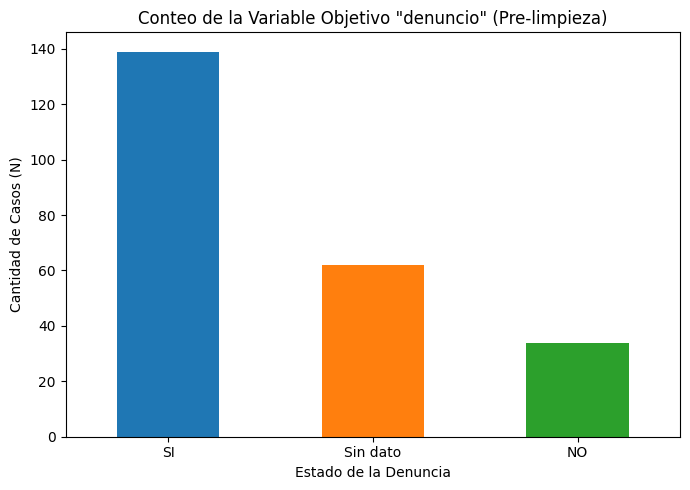

In [ ]:
# 1. Calcular el Conteo de Valores, incluyendo Nulos (dropna=False)
denuncio_counts = df['denuncio'].value_counts(dropna=False)
total_rows = len(df)

# Reemplazar el índice NaN por una etiqueta clara para el gráfico y la tabla
denuncio_counts.index = denuncio_counts.index.fillna('Sin dato')

# 2. Generar el gráfico de barras
plt.figure(figsize=(7, 5))
# Se usa el índice renombrado para las etiquetas del eje X
denuncio_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title('Conteo de la Variable Objetivo "denuncio" (Pre-limpieza)')
plt.xlabel('Estado de la Denuncia')
plt.ylabel('Cantidad de Casos (N)')
plt.xticks(rotation=0) # Mantiene las etiquetas horizontales
plt.tight_layout()

# 3. Mostrar la tabla de análisis
denuncio_percentages = (denuncio_counts / total_rows) * 100
denuncio_analysis_df = pd.DataFrame({
    'Conteo': denuncio_counts,
    'Porcentaje (%)': denuncio_percentages.round(2)
}).sort_values(by='Conteo', ascending=False)

print("--- Conteo de la Variable 'denuncio' ---")
print(denuncio_analysis_df.to_markdown())

    'denuncio':
Tal como se presenta la variable, estamos ante un caso de desbalance de clases. El 14% de los casos indican que NO hubo denuncia (grupo minoritario que entra en conflicto con lo que se quiere predecir) y un 26% corresponden a nulos (sin datos).

Fue crucial la información externa que se tuvo para poder darle contexto a esos datos nulos; entendiendo que cuando no hay dato, es porque no hubo denuncia formal presentada en el sistema de justicia. Esto se conoce, ya que se habla de un dataset que registra denuncias confirmadas y denuncias no confirmadas, por tener vinculación y acceso directo a resoluciones del sistema judicial.

Acciones recomendadas:

Imputar los valores nulos (sin dato) como NO.

Convertir la columna denuncio (ahora sin nulos) a un formato numérico binario.

#### Actualización del análisis de variable objetivo (denuncia SI/NO)

Nota: para comprender lo que se describe a continuación es crucial leer todo el análisis de suposición realizado en la sección posterior.

Se realizó un análisis de suposición que cuestionaba la hipótesis inicial ("Si Denuncia es Nula, no hubo denuncia"). A partir de la revisión de las variables  'medidas_de_protección' y 'fecha_fin_de_vigencia', se postuló que "Hay registros en las variables cuando SI hay denuncia formalizada", lo cual permitió identificar que casos donde 'denuncia' era nulo, tenía contenidos válidos en las otras dos variables.

En línea con lo anterior, el descubrimiento obtenido fue que la regla brindada por la fuente externa (Dirección General de Género) debe ser cuestionada por haberse encontrado al menos 1 registro que no cumple con "todo valor ingresado como nulo, es un 'NO denuncia'".

En pocas palabras, la regla quedaria definida como que "la denuncia NULA se corrige a 'SI' solo si hay evidencia de que el proceso judicial ocurrió (simultaneidad de medidas de protección y fechas válidas)"

**Esto requiere que en la limpieza, se cree una regla de imputación para los valores nulos, entendiendo que si hay dato válido en 'medidas_de_protección' y 'fecha_fin_de_vigencia' simultáneamente, para un registro categorizado como dato NULO en 'denuncio', debe modificarse a 'SI'.**

Se entiende como dato válido a:

| Variable | Dato NO válido | Dato Válido
| --- | --- | --- |
| medidas_de_proteccion | NO', 'Nulo (Sin dato)', NaN, o similares | Medida específica o combinación de ellas |
| fecha_fin_de_vigencia | NO', 'Nulo (Sin dato)', NaN, o similares o una fecha inferior al 01/07/2024 ($45474$)| No Nulo, código de fecha $\geq 45474$ (1 de julio de 2024) |


Dado que las medidas de protección poseen una vigencia máxima de seis meses y el dataset analizado corresponde al año 2025, no resulta razonable considerar como válidas fechas demasiado antiguas. Por este motivo, solo deben considerarse válidos aquellos registros cuya fecha_fin_de_vigencia se encuentre dentro del segundo semestre de 2024 en adelante.

De este modo, se asume que una fecha anterior a julio de 2024 implica un registro obsoleto, erróneo o no vinculado a la denuncia vigente, mientras que una fecha igual o posterior a dicho período constituye evidencia de una medida judicial reciente y, por lo tanto, de una denuncia efectivamente formalizada.

Esta decisión se fundamenta en la vigencia limitada de las medidas de protección y en la necesidad de garantizar coherencia temporal entre los distintos componentes del proceso judicial.

### Análisis de suposición: variables tratadas cuando la denuncia SI se efectuó

En el análisis de previsualización de los datos, quedan 4 variables por observar. Una suposición inicial, refiere que son cuestiones que aparecen cuando la denuncia se formalizó.

Esta suposición es la que queremos refutar o validar observando los datos crudos del dataset trabajado y la distribución de las variables bajo análisis.





In [ ]:
# Definición de columnas a analizar y generación de tablas:
col_proteccion = ['medidas_de_proteccion','fecha_fin_de_vigencia','personas_a_cargo','red_vincular']

for col in col_proteccion:
    generate_categorical_table(df, col)


--- Tabla de Conteo de la Variable 'medidas_de_proteccion' (Pre-limpieza) ---
| medidas_de_proteccion                            |   Conteo |   Porcentaje (%) |
|:-------------------------------------------------|---------:|-----------------:|
| Nulo (Sin dato)                                  |       93 |            39.57 |
| Prohibición de acercamiento                      |       89 |            37.87 |
| NO                                               |       40 |            17.02 |
| Botón antipánico/ Prohibición Acercamiento       |        6 |             2.55 |
| Botón Antipánico                                 |        2 |             0.85 |
| Prohibición de acercamiento/ Cese de hostigación |        2 |             0.85 |
| Exclusión del hogar                              |        2 |             0.85 |
| Cese hostigamiento                               |        1 |             0.43 |

--- Tabla de Conteo de la Variable 'fecha_fin_de_vigencia' (Pre-limpieza) ---
| fecha_fin_

Antes de analizar puntualmente cada variable, se debe cuestionar la suposición inicial que se tiene sobre los datos:

> "Hay registros en estas variables, cuando SI hay denuncia formalizada".


Para el siguiente análisis, se van a excluir las confirmaciones negativas explícitas ('NO') y los valores faltantes ('Nulo(Sin dato)' o 'sin datos'), ya que no refutaria la suposición casos donde hay un 'NO DENUNCIA' o 'DENUNCIA NULO' y en la variable de análisis se corresponde también un 'NO'.

Se quieren evaluar únicamente casos donde hay afirmaciones positivas en las $4$ variables pero la denuncia fue NO o NULA. Por lo tanto, se consideran solo los casos donde hay existencia de un dato positivo (un nombre, una medida, una fecha de vigencia).

In [ ]:
# Define the columns for the check
denuncia_col = 'denuncio'
risk_cols = ['medidas_de_proteccion', 'fecha_fin_de_vigencia','personas_a_cargo', 'red_vincular'
             ]

# --- 1. Define the subsets ---
# Subset 1: Cases where 'denuncio' is explicitly 'NO'
df_no = df[df[denuncia_col] == 'NO'].copy()
count_no = len(df_no)

# Subset 2: Cases where 'denuncio' is explicitly NaN (Nulo)
df_nulo = df[df[denuncia_col].isna()].copy()
count_nulo = len(df_nulo)

# --- 2. Define the strict counting function for a subset ---
# This function counts only 'positive confirmation' data, excluding 'NO', 'sin datos', and NaNs.
def count_strict_positive(subset_df, column_name):
    # Set of negative/null values to exclude (case-insensitive where applicable)
    negative_confirmations = {'NO', 'NO ', 'no', 'No', 'sin datos', 'S/D'}

    # Logic for counting non-negative, non-null entries
    if column_name == 'fecha_fin_de_vigencia':
        # For dates, any non-null value is a positive confirmation of a date/number.
        return subset_df[column_name].notna().sum()

    else:
        # Count where the value is NOT in the negative set and is NOT NaN.
        # We need to handle potential typos and case variations for 'NO'.
        def is_positive_data(val):
            if pd.isna(val):
                return False
            # Check against lowercase version for robustness
            val_lower = str(val).lower()
            if val_lower in [x.lower() for x in negative_confirmations]:
                return False
            return True

        return subset_df[column_name].apply(is_positive_data).sum()

# --- 3. Calculate Strict Positive Counts ---
data = {}
for col in risk_cols:
    count_no_strict = count_strict_positive(df_no, col)
    count_nulo_strict = count_strict_positive(df_nulo, col)

    data[col] = {
        'Conteo Positivo (Denuncia = NO)': count_no_strict,
        '% del Subconjunto NO': (count_no_strict / count_no) * 100,
        'Conteo Positivo (Denuncia = NULO)': count_nulo_strict,
        '% del Subconjunto NULO': (count_nulo_strict / count_nulo) * 100
    }

# Convert the dictionary to a DataFrame for presentation
results = pd.DataFrame.from_dict(data, orient='index')
results.index.name = 'Variable'

print(f"--- Hallazgo Detallado Estricto (Sólo Confimaciones Positivas de Dato) ---")
print(f"Total de casos con 'NO' Denuncia: {count_no}")
print(f"Total de casos con 'Nulo' Denuncia: {count_nulo}")
print("\nConteo de Registros Positivos (Excluyendo 'NO', 'Nulo', 'sin datos' o similares):")
print(results.round(2).to_markdown())

--- Hallazgo Detallado Estricto (Sólo Confimaciones Positivas de Dato) ---
Total de casos con 'NO' Denuncia: 34
Total de casos con 'Nulo' Denuncia: 62

Conteo de Registros Positivos (Excluyendo 'NO', 'Nulo', 'sin datos' o similares):
| Variable              |   Conteo Positivo (Denuncia = NO) |   % del Subconjunto NO |   Conteo Positivo (Denuncia = NULO) |   % del Subconjunto NULO |
|:----------------------|----------------------------------:|-----------------------:|------------------------------------:|-------------------------:|
| medidas_de_proteccion |                                 0 |                   0    |                                   1 |                     1.61 |
| fecha_fin_de_vigencia |                                 2 |                   5.88 |                                   1 |                     1.61 |
| personas_a_cargo      |                                21 |                  61.76 |                                  36 |                    58.06 |
| red_

El análisis se centra en dos subconjuntos clave:
* Los $34$ casos donde la denuncia se registró explícitamente como 'NO'
* Los $62$ casos donde el registro es 'Nulo'

La tabla muestra en la segunda y tercera columna, la cantidad y % sobre el total de casos que hay en las $4$ variables analizadas donde **en denuncia dice NO**.

En la cuarta y quinta columna, se muestran la cantidad y % sobre el total de casos que hay en las $4$ variables analizadas donde **en denuncia dice NULO**.

Los resultados del análisis de datos crudos, permiten obtener dos conclusiones clave:

1. **personas_a_cargo** y **red_vincular**: Son variables de contexto social, no tienen dependencia con la denuncia y son datos positivos/válidos que se obtienen de la entrevista inicial sobre su contexto familiar y vincular.

  Ejemplos:
* Hay 21 registros donde se detallan 'personas_a_cargo', a pesar de NO HABER denuncia (un 62% del total de $34$ registros NO). Respecto a la 'red_vincular' los registros ascienden a 26, representando un 76% del total.

* Hay 36 registros donde se detallan 'personas_a_cargo', a pesar de HABER UN NULO en denuncia (un 58% del total de $62$ registros NULOS). Y, respecto a la 'red_vincular' los registros están en $33$, representando un 53% del total de esta categoría.

Por lo tanto, se refuta la suposición para estas dos variables y se deben limpiar e incluir a ambas como predictoras para todos los $N=235$ casos.

2. **medidas_de_proteccion** y **fecha_fin_de_vigencia**: La presencia de un dato positivo es mínima (0 a 2 casos) pero deben analizarse puntualmente para sacar conclusiones finales. Esto permitirá determinar si son errores tipográficos, outliers o, de hecho, datos válidos que refutan la suposición.

In [ ]:
# Define the columns for the check
denuncia_col = 'denuncio'
risk_cols = ['medidas_de_proteccion', 'fecha_fin_de_vigencia']

# --- 1. Filter the "Violation Subset" (Denuncia = NO or Denuncia = Nulo) ---
df_violacion = df[df[denuncia_col].isna() | (df[denuncia_col] == 'NO')].copy()

# --- 2. Filter for strictly POSITIVE data in 'medidas_de_proteccion' ---
# We exclude 'NO', 'NO ', 'no', 'No', 'sin datos', 'S/D' and NaNs.
def is_strictly_positive_medida(val):
    if pd.isna(val):
        return False
    # Check against lowercase version for robustness
    val_lower = str(val).lower().strip()
    if val_lower in {'no', 'sin datos', 's/d', ''}:
        return False
    return True

# Filter the violation subset to only include cases with positive measures data
df_positive_measures = df_violacion[df_violacion['medidas_de_proteccion'].apply(is_strictly_positive_medida)]

# --- 3. Filter for strictly POSITIVE data in 'fecha_fin_de_vigencia' ---
# For dates, any non-null value is a positive confirmation of a date/number.
df_positive_fecha = df_violacion[df_violacion['fecha_fin_de_vigencia'].notna()]


# --- 4. Display the critical cases (Focusing on the 3 unique cases found) ---

print("--- Casos Críticos: Medidas de Protección Positivas (Denuncia = NO/NULO) ---")
# Combining the two dataframes to ensure we capture all unique cases
critical_cases_medida = df_positive_measures.drop_duplicates(subset=['medidas_de_proteccion', 'denuncio'])
print(critical_cases_medida[['denuncio', 'medidas_de_proteccion', 'fecha_fin_de_vigencia']].to_markdown(index=False))

print("\n--- Casos Críticos: Fecha de Fin de Vigencia Registrada (Denuncia = NO/NULO) ---")
critical_cases_fecha = df_positive_fecha.drop_duplicates(subset=['fecha_fin_de_vigencia', 'denuncio'])
print(critical_cases_fecha[['denuncio', 'medidas_de_proteccion', 'fecha_fin_de_vigencia']].to_markdown(index=False))

--- Casos Críticos: Medidas de Protección Positivas (Denuncia = NO/NULO) ---
|   denuncio | medidas_de_proteccion       |   fecha_fin_de_vigencia |
|-----------:|:----------------------------|------------------------:|
|        nan | Prohibición de acercamiento |                   45726 |

--- Casos Críticos: Fecha de Fin de Vigencia Registrada (Denuncia = NO/NULO) ---
| denuncio   | medidas_de_proteccion       |   fecha_fin_de_vigencia |
|:-----------|:----------------------------|------------------------:|
| nan        | Prohibición de acercamiento |                   45726 |
| NO         | NO                          |                   45837 |
| NO         | nan                         |                   25336 |


Inspección de los casos críticos:

* Para medidas_de_proteccion, hay un solo caso con denuncia NULO pero confirmación positiva. Se observa que el dato es válido (Prohibición de acercamiento) y que además, tiene un caso válido de fecha_fin_de_vigencia (esta expresado en número por el formato de fecha que trajo el dataset y es superior a $45474$ (01/07/2024)).

Esto desprende dos posibilidades:

A) En caso de confirmarse el error de carga como denuncia SI, **no está refutando la suposición inicial** ('hay registro en esta variable, cuando si hay denuncia formalizada').

Sin embargo, **si refuta la regla de oro implicita por el conocimiento obtenido por la fuente externa** ('todos los nulos son 'NO denuncia', sin una regla de validación adicional').

B) Si el caso no se confirma como error de carga, **los valores nulos serían válidos para representar el 'NO denuncia' sin reglas adicionales que lo validen**.

Además, en el caso puntual analizado no seria un outlier que deba eliminarse, sino que refiere a una inconsistencia lógica que refuerza la existencia de una vía de protección de oficio o civil sin la posterior formalización de la denuncia penal. Esto lo volvería un predictor de Alerta Máxima y **estaría refutando la suposición inicial**.

--> Entendiendo que en cualquier carga manual puede haber errores, se considera optar por lo analizado en A) para proceder respecto a esta variable.

* Para fecha_fin_de_vigencia, hay 3 casos con denuncia NO/NULO pero confirmación positiva.

I) El primer caso corresponde con una fecha válida y coincide con el único analizado para medidas_de_proteccion. Por lo tanto, es registro válido pero hay un error en la carga de 'denuncio', ya que seria 'SI' en lugar de 'nan'.

II) El segundo caso, hay una fecha válida pero una medidas_de_proteccion aclarada como 'NO' y el caso de denuncia aclarado explicitamente como 'NO'. Por lo tanto, debe considerarse como un error de carga.

III) El tercer caso, la denuncia indica NO y la medidas_de_proteccion figura como NULO. Ademas, hay una fecha (25336 - alrededor de 1969), que representa un valor muy antiguo para el contexto del dataset (fechas superiores a $45474$ - 01/07/2024 - ). Por lo tanto, este caso parece ser un error de data entry o un valor placeholder antiguo.

El hecho de que el caso II y III fueron refutados como errores de carga, y el único caso válido para esta variable (I) coincide con el único caso de medidas_de_proteccion analizado, hace concluir en lo siguiente:

**No se encontró ningun caso válido para afirmar que medidas_de_proteccion y fecha_fin_de_vigencia ocurren cuando NO hay denuncia o hay NULOS en su lugar. El único caso para ambos, coincide que hubo un error en la carga de denuncia y corresponde que SI hubo. Por lo tanto, no se puede afirmar que sean independientes de 'SI Denuncia'. Se recomienda analizar, luego de la limpieza, la correlación entre sí en el EDA.**


**Por otro lado, sí valida un caso que en el que un 'NULO en denuncia' no hacía referencia a una 'NO denuncia', por lo que refuta también la información externa sin validación con ninguna regla.**

El resumen del análisis para estas cuatro variables es el siguiente:

    'medidas_de_proteccion':
Se demostró que esta variable no es útil por sí sola, pero es esencial para validar la calidad del target.

Nota: Se debe considerar excluir esta feature del modelo si se usa para la imputación del target (denuncio), debido a la fuga de datos (data leakage).

Acciones recomendadas para la limpieza luego de validar el target:

Imputar Nulo (Sin dato) en la categoría 'Desconocido'.



    'fecha_fin_de_vigencia':

Se demostró que esta variable no es útil por sí sola, pero es esencial para validar la calidad del target.

Nota: Se debe considerar excluir esta feature del modelo si se usa para la imputación del target (denuncio), debido a la fuga de datos (data leakage).

Acciones recomendadas para la limpieza ANTES de validar el target:

Como no existe una variable llamada fecha_registro para validar la vigencia, se debe aplicar el filtro de rango $\geq 45474$ (1 de julio de 2024) para tratar los outliers como nulos y limpiar la columna.

Nota: Los registros corresponden al año en curso (2025), por lo tanto se toman como regsitros validos los ocurridos hasta el segundo semestre del 2024.

    'personas_a_cargo':

Los datos se recopilan al inicio, sin depender de la denuncia.

Acciones:

No hay cuestiones ortográficas para revisar.

Imputar Nulo (Sin dato) en la categoría 'Desconocido'.

No se necesita reagrupamiento por baja frecuencia, ya que solo hay 4 categorías únicas, pero se debe asegurar la Codificación One-Hot para toda la muestra.
Asimismo, se puede evaluar un agrupamiento para la categoría Otro/as, que es muy pequeña, con alguna categoría baja en términos predictivos. Ej. NO

    'red_vincular':

Los datos se recopilan al inicio, sin depender de la denuncia.

Acciones:

Unificar sin datos con Nulo (Sin dato) en la categoría 'Desconocido'.

Se puede evaluar un agrupamiento para la categoría VECINAS/OS, que es muy pequeña, con alguna categoría baja en términos predictivos. Ej. NO

# 2. Limpieza de datos y preprocesamiento

# a. *Eliminar columnas*

Seguimos como criterio la privacidad, la fuga de datos (leakeage) y la irrelevancia. Como es un proceso iterativo, más adelante eliminamos algunas más.

In [ ]:


# 2. Columnas a eliminar por FUGA DE DATOS (DATA LEAKAGE)
# Estas columnas contienen información que SÓLO se puede conocer
# DESPUÉS de que el evento (denunciar) ha ocurrido.
# Por ejemplo, si 'medidas_de_proteccion' tiene un valor,
# implícitamente nos dice que SÍ hubo una denuncia.

#cols_fuga_datos = [
  #  'medidas_de_proteccion',
  #  'fecha_fin_de_vigencia'
#]

## OJO CON ESTE PUNTO 2.!!!! ## en le previsualización descubri un caso que
# tenia medidas de proteccion valida (prohibicion) y fecha valida tmb
# pero que estaba como NULO --> a eso lo hubiesemos imputado como
# denuncia NO y enredalidad era Denuncia SI
# esto hace que tengamos que imputar los nulos de la variable objetivo
# bajo una regla, no es simplemente "todos los nulos son NO"
# luego de validar esa variable objetivo, SI esta bien eliminar esas columnas
# porque harian que haya multicolinealidad




# 3. Columnas a eliminar por IRRELEVANCIA o RUIDO
# Estas columnas no deberían ser predictivas.
# 'profesionales': El profesional que atiende el caso no debería
# ser un factor para predecir si la víctima denunciará.

cols_irrelevantes = [
    'profesionales',
    'motivo_de_consulta' #son todas violencia
]

# Combinamos todas las listas de columnas a eliminar
columnas_a_eliminar = cols_irrelevantes # + cols_fuga_datos

# Verificamos qué columnas del dataset realmente existen para evitar errores
# (Esto es una buena práctica si el CSV cambia)
columnas_en_df = [col for col in columnas_a_eliminar if col in df.columns]

# Eliminamos las columnas del DataFrame
# axis=1 indica que queremos eliminar columnas (no filas)
# inplace=True modifica el DataFrame 'df' directamente
df.drop(columns=columnas_en_df, axis=1, inplace=True)

# Imprimimos las columnas restantes para verificar
print("Columnas restantes en el DataFrame:")
df.info()

print("\n--- Primeras 5 filas después de eliminar columnas ---")
df.head()


Columnas restantes en el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               225 non-null    float64
 1   medio_por_el_que_ingresa           188 non-null    object 
 2   genero                             231 non-null    object 
 3   nacionalidad                       229 non-null    object 
 4   barrio                             235 non-null    object 
 5   municipio                          233 non-null    object 
 6   localidad                          234 non-null    object 
 7   estado_civil                       214 non-null    object 
 8   nivel_educativo                    208 non-null    object 
 9   situacion_laboral                  190 non-null    object 
 10  percibe_prestacion_estatal         140 non-null    object 
 11  vivienda              

,edad,medio_por_el_que_ingresa,genero,nacionalidad,barrio,municipio,localidad,estado_civil,nivel_educativo,situacion_laboral,...,simbolica,ambiental,politica,digital,cant_tipos_violencias_por_persona,denuncio,medidas_de_proteccion,fecha_fin_de_vigencia,personas_a_cargo,red_vincular
0,28.0,NaN,Mujer,Argentina,bordeu,Bahía Blanca,Bahía Blanca,Soltera,Secundario incompleto,No trabaja,...,0.0,0.0,0.0,0.0,2.0,NO,NO,NaN,NO,PARIENTES CONVIVIENTES
1,43.0,NaN,Mujer,Argentina,pacifico,Bahía Blanca,Bahía Blanca,NaN,Terciario completo,NaN,...,0.0,1.0,0.0,0.0,4.0,SI,Prohibición de acercamiento,NaN,Hija/Hijo,PARIENTES NO CONVIVIENTES
2,53.0,NaN,Mujer,Argentina,pampa central,Bahía Blanca,Bahía Blanca,Soltera,Primario completo,NaN,...,0.0,0.0,0.0,0.0,2.0,NO,NO,NaN,NO,PARIENTES NO CONVIVIENTES
3,49.0,NaN,Mujer,Argentina,centro,Bahía Blanca,Gral. Daniel Cerri,NaN,Secundario completo,Trabajo informal,...,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,PARIENTES NO CONVIVIENTES
4,48.0,NaN,Mujer,Argentina,sin datos,Bahía Blanca,Bahía Blanca,Separada,Terciario en curso,Trabajo formal,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Hija/Hijo,PARIENTES NO CONVIVIENTES


# b. *Definir variable objetivo: DENUNCIA*

Definimos y transformamos la variable objetivo. Creamos la columna denuncia_target que es binaria (0= SI, 1= NO).

In [ ]:
### DEFINIR VARIABLE OBJETIVO (versión actualizada)

print("--- 1. Explorando la columna 'denuncio' (antes de limpiar) ---")
print(df['denuncio'].value_counts(dropna=False))

# ----------------------------------------------------------------------
# 2. LIMPIAR Y ESTANDARIZAR la columna 'denuncio'
# ----------------------------------------------------------------------
print("\n--- 2. Limpiando, estandarizando y completando 'denuncio' según otras columnas ---")

# A. Estandarizar el texto a mayúsculas
df['denuncio'] = df['denuncio'].astype(str).str.upper()

# B. Reemplazar strings que representan valores vacíos o nulos por NaN real
df['denuncio'] = df['denuncio'].replace(['SIN DATOS', ' ', '', 'NAN'], np.nan)

# ----------------------------------------------------------------------
# C. Revisar columnas auxiliares: 'medidas_de_proteccion' y 'fecha_fin_de_vigencia'
# ----------------------------------------------------------------------

# Estandarizar también la columna de medidas de protección
df['medidas_de_proteccion'] = df['medidas_de_proteccion'].astype(str).str.upper()

# Si 'medidas_de_proteccion' dice "SI" (en cualquier formato), entonces denunció = "SI"
condicion_medidas = df['medidas_de_proteccion'].str.contains('SI', na=False, regex=False)
df.loc[condicion_medidas, 'denuncio'] = 'SI'

# Si 'medidas_de_proteccion' dice "NO" o es nulo, revisar 'fecha_fin_de_vigencia'
# Si hay una fecha válida (no nula), también se interpreta como "SI"
# (asumimos que si hay una fecha, hay una medida registrada)
df['fecha_fin_de_vigencia'] = pd.to_datetime(df['fecha_fin_de_vigencia'], errors='coerce')

condicion_fecha_valida = df['fecha_fin_de_vigencia'].notna()
# Solo aplicamos a los que aún no tienen "SI" en 'denuncio'
df.loc[df['denuncio'].isna() & condicion_fecha_valida, 'denuncio'] = 'SI'

# ----------------------------------------------------------------------
# D. Finalmente, imputar los faltantes restantes como "NO"
# ----------------------------------------------------------------------
df['denuncio'].fillna('NO', inplace=True)

# Filtrar valores válidos
df = df[df['denuncio'].isin(['SI', 'NO'])]

print("Valores después de limpiar e imputar:")
print(df['denuncio'].value_counts())

# ----------------------------------------------------------------------
# 3. BINARIZAR (Convertir a números)
# ----------------------------------------------------------------------
print("\n--- 3. Creando la variable target numérica (y) ---")

# NOTA: mantenemos tu mapeo original, donde 'NO' = 1 (clase positiva)
mapeo_target = {
    'NO': 1,
    'SI': 0
}

df['denuncio_target'] = df['denuncio'].map(mapeo_target)

# ----------------------------------------------------------------------
# 4. VERIFICACIÓN FINAL
# ----------------------------------------------------------------------
print("\n--- 4. Verificación Final ---")
print("Conteo de la nueva columna 'denuncio_target':")
print(df['denuncio_target'].value_counts())

print("\nVista previa de las columnas transformadas:")
print(df[['denuncio', 'denuncio_target', 'medidas_de_proteccion', 'fecha_fin_de_vigencia']].head(10))


--- 1. Explorando la columna 'denuncio' (antes de limpiar) ---
denuncio
SI     139
NaN     62
NO      34
Name: count, dtype: int64

--- 2. Limpiando, estandarizando y completando 'denuncio' según otras columnas ---
Valores después de limpiar e imputar:
denuncio
SI    139
NO     96
Name: count, dtype: int64

--- 3. Creando la variable target numérica (y) ---

--- 4. Verificación Final ---
Conteo de la nueva columna 'denuncio_target':
denuncio_target
0    139
1     96
Name: count, dtype: int64

Vista previa de las columnas transformadas:
  denuncio  denuncio_target        medidas_de_proteccion fecha_fin_de_vigencia
0       NO                1                           NO                   NaT
1       SI                0  PROHIBICIÓN DE ACERCAMIENTO                   NaT
2       NO                1                           NO                   NaT
3       NO                1                          NAN                   NaT
4       NO                1                          NAN       

/tmp/ipython-input-1318749222.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha_fin_de_vigencia'] = pd.to_datetime(df['fecha_fin_de_vigencia'], errors='coerce')
/tmp/ipython-input-1318749222.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['denuncio'].fillna('NO', inplace=True)


# c. *Cambios de formato y unificación de valores: puntuación, mayúsculas, caracteres especiales*

Eliminamos formatos que generan ruido en el df.

In [ ]:
print("--- 1. Identificando columnas de texto (features) ---")

# Seleccionamos todas las columnas de tipo 'object' (texto)
columnas_texto = df.select_dtypes(include=['object']).columns

# Excluimos la columna 'denuncio' que ya procesamos
columnas_texto = columnas_texto.drop('denuncio', errors='ignore')

print(f"Se normalizarán {len(columnas_texto)} columnas de texto.")
print(list(columnas_texto))

# ----------------------------------------------------------------------

# --- 2. Aplicando la normalización completa ---

for col in columnas_texto:

    # Aseguramos que todo sea tipo 'string' y convertimos a minúsculas
    temp_series = df[col].astype(str).str.lower()

    # Quitamos tildes y diacríticos (ej. 'bahía' -> 'bahia')
    # Esto descompone 'í' en 'i' y un acento, luego ignora el acento.
    temp_series = temp_series.str.normalize('NFKD') \
                             .str.encode('ascii', errors='ignore') \
                             .str.decode('utf-8')

    # Quitamos caracteres especiales y puntuación
    # Reemplazamos todo lo que NO sea una letra (a-z), un número (0-9)
    # o un espacio en blanco (\s) por un string vacío.
    temp_series = temp_series.str.replace(r'[^a-z0-9\s]', '', regex=True)

    # Reemplazamos dobles (o múltiples) espacios por un espacio simple
    temp_series = temp_series.str.replace(r'\s+', ' ', regex=True)

    # Quitamos espacios en blanco al inicio o al final
    temp_series = temp_series.str.strip()

    # Asignamos la serie limpia de vuelta al DataFrame
    df[col] = temp_series

print("\n--- 3. Normalización de texto completada ---")

# ----------------------------------------------------------------------

# --- 4. Verificación ---
# Revisamos una columna para ver el resultado.
# 'primario incompletp' ahora debería ser 'primario incompleto' (bueno, 'incompletp')
# 'terciario en curso' (con tilde) -> 'terciario en curso' (sin tilde)

if 'nivel_educativo' in df.columns:
    print("\n--- Verificación (ej. 'nivel_educativo') ---")
    print(df['nivel_educativo'].value_counts())
else:
    print("\nNo se encontró 'nivel_educativo' para verificar.")

# Vista previa para ver el resultado general
print("\n--- Vista previa del DataFrame normalizado ---")
pd.set_option('display.max_columns', None) # Muestra todas las columnas
print(df.head(3))

--- 1. Identificando columnas de texto (features) ---
Se normalizarán 22 columnas de texto.
['medio_por_el_que_ingresa', 'genero', 'nacionalidad', 'barrio', 'municipio', 'localidad', 'estado_civil', 'nivel_educativo', 'situacion_laboral', 'percibe_prestacion_estatal', 'vivienda', 'obra_social', 'diagnostico', 'tratamiento', 'posee_cud', 'cant_personas_a_cargo', 'hijos_pea', 'convivencia_pea', 'modalidad_de_violencia', 'medidas_de_proteccion', 'personas_a_cargo', 'red_vincular']

--- 3. Normalización de texto completada ---

--- Verificación (ej. 'nivel_educativo') ---
nivel_educativo
secundario incompleto                67
secundario completo                  40
nan                                  27
terciario completo                   21
primario completo                    19
terciario incompleto                 11
primario incompletp                  10
universitario completo               10
terciario en curso                    7
universitario incompleto              6
secundari

In [ ]:
##Revisamos los valores únicos para avanzar en las transformaciones

print("--- REVISIÓN DE VALORES ÚNICOS POR COLUMNA ---")

# Define un umbral. Si hay más de 50 valores únicos,
# no los imprimimos todos para no inundar la pantalla.
UMBRAL_PARA_MOSTRAR = 50

for col in df.columns:
    # 1. Contamos cuántos valores únicos hay
    num_unicos = df[col].nunique()

    # 2. Imprimimos el encabezado de la columna
    print(f"\n--- Columna: '{col}' (Tipo: {df[col].dtype}) ---")
    print(f"Total de valores únicos: {num_unicos}")

    # 3. Decidimos si mostrar los valores o no
    if num_unicos > UMBRAL_PARA_MOSTRAR:
        # Si son demasiados, mostramos solo los primeros 5 como ejemplo
        print("Valores (ejemplos):")
        print(df[col].unique()[:5])
    else:
        # Si son pocos, los mostramos todos
        print("Valores:")
        print(df[col].unique())

print("\n--- Fin de la revisión ---")

--- REVISIÓN DE VALORES ÚNICOS POR COLUMNA ---

--- Columna: 'edad' (Tipo: float64) ---
Total de valores únicos: 52
Valores (ejemplos):
[28. 43. 53. 49. 48.]

--- Columna: 'medio_por_el_que_ingresa' (Tipo: object) ---
Total de valores únicos: 11
Valores:
['nan' 'notificacion judicial' 'comisaria' 'sin datos' 'espontanea'
 'turno programado' 'otra' 'unidad sanitaria' 'institucion educativa'
 'organizacion socialinstitucion comunitaria' 'hospital']

--- Columna: 'genero' (Tipo: object) ---
Total de valores únicos: 4
Valores:
['mujer' 'otro' 'sin datos' 'nan']

--- Columna: 'nacionalidad' (Tipo: object) ---
Total de valores únicos: 6
Valores:
['argentina' 'no' 'sin datos' 'nan' 'sd' 'chilena']

--- Columna: 'barrio' (Tipo: object) ---
Total de valores únicos: 101
Valores (ejemplos):
['bordeu' 'pacifico' 'pampa central' 'centro' 'sin datos']

--- Columna: 'municipio' (Tipo: object) ---
Total de valores únicos: 4
Valores:
['bahia blanca' 'nan' 'punta alta' 'buenos aires']

--- Columna: 'loc

In [ ]:
# Muestra el conteo de cada valor único en la columna 'medio_por_el_que_ingresa'
print(df['personas_a_cargo'].value_counts())

# Si también quieres incluir en el conteo cualquier valor nulo (NaN) que pueda
# haber (aunque ahora parezcan ser el texto 'nan'), puedes agregar esto:
# print(df['medio_por_el_que_ingresa'].value_counts(dropna=False))

personas_a_cargo
hijahijo    151
nan          52
no           29
otrosas       3
Name: count, dtype: int64


# d. *Eliminación de variables y Limpieza de variables predictoras*

Incluye la eliminación de columnas con información redundante o excesivamente incompleta (Barrio).


In [ ]:
# Eliminar columnas específicas que ya se ven reflejadas en la variable objetivo (leakeage)
df.drop(columns=['medidas_de_proteccion', 'fecha_fin_de_vigencia'], inplace=True)

# Verificar que se eliminaron correctamente
print("Columnas restantes:")
print(df.columns.tolist())


Columnas restantes:
['edad', 'medio_por_el_que_ingresa', 'genero', 'nacionalidad', 'barrio', 'municipio', 'localidad', 'estado_civil', 'nivel_educativo', 'situacion_laboral', 'percibe_prestacion_estatal', 'vivienda', 'obra_social', 'diagnostico', 'tratamiento', 'posee_cud', 'cant_personas_a_cargo', 'hijos_pea', 'convivencia_pea', 'modalidad_de_violencia', 'fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital', 'cant_tipos_violencias_por_persona', 'denuncio', 'personas_a_cargo', 'red_vincular', 'denuncio_target']


Abordamos **Medio de ingreso**, donde reemplazamos los valores faltantes.

In [ ]:
#cambios en Medio de ingreso

print("--- ANTES de la corrección en 'medio_por_el_que_ingresa' ---")
print(df['medio_por_el_que_ingresa'].value_counts(dropna=False))

# --- Definimos los valores que queremos reemplazar ---
valores_a_reemplazar = ['nan', 'sin datos']

# --- Definimos el nuevo valor ---
nuevo_valor = 'otra'

# --- Aplicamos el reemplazo en la columna ---
# 'inplace=True' modifica el DataFrame directamente
df['medio_por_el_que_ingresa'].replace(valores_a_reemplazar, nuevo_valor, inplace=True)

print("\n--- DESPUÉS de la corrección en 'medio_por_el_que_ingresa' ---")
# Verificamos que 'nan' y 'sin datos' ya no existen
# y que el conteo de 'otra' ha aumentado.
print(df['medio_por_el_que_ingresa'].value_counts(dropna=False))




--- ANTES de la corrección en 'medio_por_el_que_ingresa' ---
medio_por_el_que_ingresa
notificacion judicial                         83
espontanea                                    50
nan                                           47
otra                                          26
turno programado                              15
comisaria                                      6
unidad sanitaria                               3
organizacion socialinstitucion comunitaria     2
sin datos                                      1
institucion educativa                          1
hospital                                       1
Name: count, dtype: int64

--- DESPUÉS de la corrección en 'medio_por_el_que_ingresa' ---
medio_por_el_que_ingresa
notificacion judicial                         83
otra                                          74
espontanea                                    50
turno programado                              15
comisaria                                      6
unidad sanitari

/tmp/ipython-input-2352298851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['medio_por_el_que_ingresa'].replace(valores_a_reemplazar, nuevo_valor, inplace=True)


Después trabajamos sobre **Género**. Todos los valores son Mujer a excepción de cuatro. Binarizamos la variable y establecemos: mujer = 0, cualquier otro valor = 1.

In [ ]:
#cambios en Género

print("--- ANTES de la corrección en 'genero' ---")
if 'genero' in df.columns:
    print(df['genero'].value_counts(dropna=False))
else:
    print("La columna 'genero' no existe.")

if 'genero' in df.columns:
    # Normalizamos a minúsculas por si acaso
    df['genero'] = df['genero'].str.lower().str.strip()

    # Binarización: mujer = 0; sin datos, nan u otro = 1
    df['genero_bin'] = np.where(df['genero'] == 'mujer', 0, 1)

    print("\n--- DESPUÉS de la binarización ---")
    print(df['genero'].value_counts(dropna=False))
    print("\n--- Valores binarizados en 'genero_bin' ---")
    print(df['genero_bin'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'genero' no existe.")


--- ANTES de la corrección en 'genero' ---
genero
mujer        228
nan            4
sin datos      2
otro           1
Name: count, dtype: int64

--- DESPUÉS de la binarización ---
genero
mujer        228
nan            4
sin datos      2
otro           1
Name: count, dtype: int64

--- Valores binarizados en 'genero_bin' ---
genero_bin
0    228
1      7
Name: count, dtype: int64


**Barrio** podría ser una variable interesante pero tiene algunos faltantes. No hay errores en la escritura. En otra etapa agregamos una división por zonas.

In [ ]:
(df['barrio'].isin(['', ' ', 'nan', None])).mean()


np.float64(0.0)

In [ ]:
df['barrio'].value_counts(dropna=False).head(10)


,count
barrio,
sin datos,20
noroeste,20
ingeniero white,11
centro,7
vista alegre,6
villa rosas,5
spurr,5
villa delfina,5
universitario,5


Limpieza de Nacionalidad:
- Reemplazo de nulos o sin datos por "otro"
- Creación de variable binaria nacionalidad_bin

Limpieza de Municipio y Localidad:
- Reemplazo de nulos, sin datos y otras localidades/municipios distintos a Bahía Blanca por "otro"
- Creación de dos variables binarias:

In [ ]:
#cambios en Nacionalidad

print("--- ANTES de la corrección en 'nacionalidad' ---")
if 'nacionalidad' in df.columns:
    print(df['nacionalidad'].value_counts(dropna=False))
else:
    print("La columna 'nacionalidad' no existe.")

if 'nacionalidad' in df.columns:
    # --- Normalizamos la columna ---
    df['nacionalidad'] = df['nacionalidad'].astype(str).str.lower().str.strip()

    # --- Unificamos los valores no argentinos en "otro" ---
    valores_no_arg = ['no', 'nan', 'sd', 'sin datos', 'otra', 'otro', '', 'ninguna', 'ninguno', 'extranjera', 'extranjero']
    df['nacionalidad'] = np.where(df['nacionalidad'].isin(['argentina']), 'argentina', 'otro')

    # --- Creamos la variable binaria ---
    df['nacionalidad_bin'] = np.where(df['nacionalidad'] == 'argentina', 0, 1)

    print("\n--- DESPUÉS de la corrección en 'nacionalidad' ---")
    print(df['nacionalidad'].value_counts(dropna=False))
    print("\n--- Valores binarizados en 'nacionalidad_bin' ---")
    print(df['nacionalidad_bin'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'nacionalidad' no existe.")

#cambios en Barrio - tiene excesivos faltantes, eliminar

#df.drop(columns=['barrio'], axis=1, inplace=True, errors='ignore')



###cambios en Municipio (es posible que luego de EDA haya que borrar uno de estos)

## --- MUNICIPIO ---
print("--- ANTES de la corrección en 'municipio' ---")
if 'municipio' in df.columns:
    print(df['municipio'].value_counts(dropna=False))
else:
    print("La columna 'municipio' no existe.")

if 'municipio' in df.columns:
    # 1. LIMPIEZA INICIAL
    # Normalizamos texto
    df['municipio'] = df['municipio'].astype(str).str.lower().str.strip()

    # Reemplazamos valores faltantes o 'nan' por 'sin datos'
    # (Esto ahora se agrupará en 'otro' en el siguiente paso)
    df['municipio'].replace(['nan', 'none', '', 'sd'], 'sin datos', inplace=True)


    # 2. REEMPLAZO Y CONSOLIDACIÓN (Regla 1)
    # Unificamos todos los valores que no sean "bahia blanca" en "otro"
    # Esto reemplaza 'punta alta', 'buenos aires' y 'sin datos' por 'otro'
    df['municipio'] = np.where(df['municipio'] == 'bahia blanca', 'bahia blanca', 'otro')

    print("\n--- DESPUÉS de la corrección en 'municipio' ---")
    print(df['municipio'].value_counts(dropna=False))


    # 3. BINARIZACIÓN (Regla 2)
    # Creamos 'municipio_bin': bahia blanca = 0, otro = 1
    df['municipio_bin'] = np.where(df['municipio'] == 'bahia blanca', 0, 1)

    print("\n--- Valores binarizados en 'municipio_bin' ---")
    print(df['municipio_bin'].value_counts(dropna=False))

else:
    print("No se pudo aplicar la corrección porque la columna 'municipio' no existe.")


# --- LOCALIDAD ---
# (Tu script para Localidad ya estaba correcto y usa esta misma lógica)
print("\n--- ANTES de la corrección en 'localidad' ---")
if 'localidad' in df.columns:
    print(df['localidad'].value_counts(dropna=False))
else:
    print("La columna 'localidad' no existe.")

if 'localidad' in df.columns:
    # 1. LIMPIEZA Y REEMPLAZO (Regla 1)
    # Normalizamos texto
    df['localidad'] = df['localidad'].astype(str).str.lower().str.strip()

    # Unificamos todos los valores que no sean "bahia blanca" en "otro"
    # (Esto automáticamente maneja 'nan' y otros valores, convirtiéndolos en 'otro')
    df['localidad'] = np.where(df['localidad'] == 'bahia blanca', 'bahia blanca', 'otro')

    # 2. BINARIZACIÓN (Regla 2)
    # Creamos variable binaria: bahia blanca = 0, otro = 1
    df['localidad_bin'] = np.where(df['localidad'] == 'bahia blanca', 0, 1)

    print("\n--- DESPUÉS de la corrección y binarización en 'localidad' ---")
    print(df['localidad'].value_counts(dropna=False))
    print("\n--- Valores binarizados en 'localidad_bin' ---")
    print(df['localidad_bin'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'localidad' no existe.")

--- ANTES de la corrección en 'nacionalidad' ---
nacionalidad
argentina    219
nan            6
sd             5
sin datos      2
chilena        2
no             1
Name: count, dtype: int64

--- DESPUÉS de la corrección en 'nacionalidad' ---
nacionalidad
argentina    219
otro          16
Name: count, dtype: int64

--- Valores binarizados en 'nacionalidad_bin' ---
nacionalidad_bin
0    219
1     16
Name: count, dtype: int64
--- ANTES de la corrección en 'municipio' ---
municipio
bahia blanca    231
nan               2
punta alta        1
buenos aires      1
Name: count, dtype: int64

--- DESPUÉS de la corrección en 'municipio' ---
municipio
bahia blanca    231
otro              4
Name: count, dtype: int64

--- Valores binarizados en 'municipio_bin' ---
municipio_bin
0    231
1      4
Name: count, dtype: int64

--- ANTES de la corrección en 'localidad' ---
localidad
bahia blanca         228
gral daniel cerri      3
nan                    1
punta alta             1
buenos aires           

/tmp/ipython-input-1366981524.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['municipio'].replace(['nan', 'none', '', 'sd'], 'sin datos', inplace=True)


Limpieza en **Estado civil**, **Nivel educativo** y **Situación laboral**

- Agrupamos los nulos en "sin datos" y unificamos "Separada/Divorciada"
- Corregimos la escritura en Nivel educativo
- Corregimos la escritura en Situacón laboral y reagrupamos

Más adelante tendremos que usar one-hot encoding para desplegarlas.

In [ ]:
# --- 1. Cambios en Estado civil ---
# REGLA: 'nan' y 'sin datos' -> 'soltera'
# REGLA: 'separada' y 'divorciada' -> 'separada/divorciada'

print("--- ANTES de la corrección en 'estado_civil' ---")
if 'estado_civil' in df.columns:
    print(df['estado_civil'].value_counts(dropna=False))
else:
    print("La columna 'estado_civil' no existe.")

if 'estado_civil' in df.columns:
    # --- Normalizamos primero ---
    df['estado_civil'] = df['estado_civil'].astype(str).str.lower().str.strip()

    # --- Definimos el mapa de reemplazos ---
    mapa_estado_civil = {
        'nan': 'soltera',
        'sin datos': 'soltera',
        'separada': 'separada/divorciada',
        'divorciada': 'separada/divorciada'
    }

    # --- Aplicamos el reemplazo con el mapa ---
    df['estado_civil'].replace(mapa_estado_civil, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'estado_civil' ---")
    print(df['estado_civil'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'estado_civil' no existe.")

# --- 2. Cambios en Nivel educativo ---
# REGLA: Solo se corrigen errores de tipeo (como pediste).

print("\n--- ANTES de la corrección en 'nivel_educativo' ---")
if 'nivel_educativo' in df.columns:
    print(df['nivel_educativo'].value_counts(dropna=False))
else:
    print("La columna 'nivel_educativo' no existe.")

if 'nivel_educativo' in df.columns:
    # --- Normalizamos primero ---
    df['nivel_educativo'] = df['nivel_educativo'].astype(str).str.lower().str.strip()

    # --- Definimos el mapa de reemplazos para corregir tipeos ---
    mapa_reemplazo_nivel = {
        'primario incompletp': 'primario incompleto',
        'univrtsitario incompleto': 'universitario incompleto',
        'nan': 'sin datos'
    }

    # Aplicamos el reemplazo
    df['nivel_educativo'].replace(mapa_reemplazo_nivel, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'nivel_educativo' ---")
    print(df['nivel_educativo'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'nivel_educativo' no existe.")


# --- 3. Cambios en Situación laboral ---
# REGLA: Se mantiene la lógica de agrupación original.

print("\n--- ANTES de la corrección en 'situacion_laboral' ---")
if 'situacion_laboral' in df.columns:
    print(df['situacion_laboral'].value_counts(dropna=False))
else:
    print("La columna 'situacion_laboral' no existe.")

if 'situacion_laboral' in df.columns:
    # --- Normalizamos primero ---
    df['situacion_laboral'] = df['situacion_laboral'].astype(str).str.lower().str.strip()

    # --- Definimos el mapa de reemplazos (el que ya tenías) ---
    mapa_reemplazos_laboral = {
        'no trabaja': 'desempleada',
        'nan': 'desempleada',
        'ama de casa': 'desempleada',
        'desocupade': 'desempleada',
        'sin datos': 'desempleada',
        'trabaja formal': 'trabajo formal',
        'cuenta propista registrado': 'cuentapropista',
        'cuenta propista no registrado': 'cuentapropista',
        'esporadico informal': 'realiza changas',
        'esporadico formal': 'realiza changas',
        'jubilade': 'pensionada'
    }

    # Aplicamos el reemplazo
    df['situacion_laboral'].replace(mapa_reemplazos_laboral, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'situacion_laboral' ---")
    print(df['situacion_laboral'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'situacion_laboral' no existe.")


--- ANTES de la corrección en 'estado_civil' ---
estado_civil
soltera               97
casada                50
separada              33
nan                   21
union convivencial    13
divorciada            10
viuda                  7
sin datos              4
Name: count, dtype: int64

--- DESPUÉS de la corrección en 'estado_civil' ---
estado_civil
soltera                122
casada                  50
separada/divorciada     43
union convivencial      13
viuda                    7
Name: count, dtype: int64

--- ANTES de la corrección en 'nivel_educativo' ---
nivel_educativo
secundario incompleto                67
secundario completo                  40
nan                                  27
terciario completo                   21
primario completo                    19
terciario incompleto                 11
primario incompletp                  10
universitario completo               10
terciario en curso                    7
universitario incompleto              6
secundario en cur

/tmp/ipython-input-1562090898.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estado_civil'].replace(mapa_estado_civil, inplace=True)
/tmp/ipython-input-1562090898.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Cambios en **Prestación estatal, viviendo, CUD y Diagnóstico**

In [ ]:

# --- 1. Cambios en Percibe prestación estatal ---
# REGLA: 'si' queda como 'si'.
# REGLA: ('nan', 'sd', 'cuota alimentaria', 'no percibe', 'sin datos', 'no') -> 'no'.
# REGLA: El resto -> 'otras'.

print("--- ANTES de la corrección en 'percibe_prestacion_estatal' ---")
if 'percibe_prestacion_estatal' in df.columns:
    print(df['percibe_prestacion_estatal'].value_counts(dropna=False))
else:
    print("La columna 'percibe_prestacion_estatal' no existe.")

if 'percibe_prestacion_estatal' in df.columns:
    # --- Normalizamos primero ---
    df['percibe_prestacion_estatal'] = df['percibe_prestacion_estatal'].astype(str).str.lower().str.strip()

    # --- Definimos las listas para cada categoría ---
    lista_no = ['nan', 'sd', 'cuota alimentaria', 'no percibe', 'sin datos', 'no']

    # --- Aplicamos la lógica con np.select (para múltiples condiciones) ---
    condiciones = [
        df['percibe_prestacion_estatal'].isin(lista_no),
        df['percibe_prestacion_estatal'] == 'si'
    ]

    valores = ['no', 'si']

    # Usamos np.select, que permite un 'default' (el resto)
    df['percibe_prestacion_estatal'] = np.select(condiciones, valores, default='otras')

    print("\n--- DESPUÉS de la corrección en 'percibe_prestacion_estatal' ---")
    print(df['percibe_prestacion_estatal'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'percibe_prestacion_estatal' no existe.")


# --- 2. Cambios en Vivienda ---
# REGLA: ('nan', 'sd', '', 'sin datos') -> 'sin datos'.
# REGLA: ('propiedad bien ganancial', 'ocupada') -> 'propia'.
# REGLA: Categorías con 4 o menos casos -> 'otras'.

print("\n--- ANTES de la corrección en 'vivienda' ---")
if 'vivienda' in df.columns:
    print(df['vivienda'].value_counts(dropna=False))
else:
    print("La columna 'vivienda' no existe.")

if 'vivienda' in df.columns:
    # --- Normalizamos primero ---
    df['vivienda'] = df['vivienda'].astype(str).str.lower().str.strip()

    # --- 1. Aplicamos las agrupaciones iniciales ---
    mapa_reemplazos_vivienda = {
        'nan': 'sin datos',
        'sd': 'sin datos',
        '': 'sin datos',
        'propiedad bien ganancial': 'propia',
        'ocupada': 'propia'
    }
    df['vivienda'].replace(mapa_reemplazos_vivienda, inplace=True)

    print("\n--- DESPUÉS de la agrupación inicial en 'vivienda' ---")
    print(df['vivienda'].value_counts(dropna=False))

    # --- 2. Aplicamos la regla de "4 casos o menos" ---
    counts = df['vivienda'].value_counts()
    # Obtenemos la lista de categorías que tienen 4 o menos
    categorias_pequenas = counts[counts <= 4].index.tolist()

    if categorias_pequenas:
        print(f"\nAgrupando en 'otras' las categorías: {categorias_pequenas}")
        df['vivienda'].replace(categorias_pequenas, 'otras', inplace=True)
    else:
        print("\nNo se encontraron categorías con 4 o menos casos para agrupar.")

    print("\n--- DESPUÉS de la corrección final en 'vivienda' ---")
    print(df['vivienda'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'vivienda' no existe.")


# --- 3. Cambios en Obra social (Mantenemos tu lógica original) ---
# REGLA: ('nan', 'sin datos', 'sd') -> 'no'.

print("\n--- ANTES de la corrección en 'obra_social' ---")
if 'obra_social' in df.columns:
    print(df['obra_social'].value_counts(dropna=False))
else:
    print("La columna 'obra_social' no existe.")

if 'obra_social' in df.columns:
    # --- Normalizamos primero ---
    df['obra_social'] = df['obra_social'].astype(str).str.lower().str.strip()

    # --- Definimos el mapa de reemplazos ---
    mapa_obra_social = {
        'nan': 'no',
        'sin datos': 'no',
        'sd': 'no'
    }
    df['obra_social'].replace(mapa_obra_social, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'obra_social' ---")
    print(df['obra_social'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'obra_social' no existe.")


# --- 4. Cambios en Diagnóstico (Mantenemos tu lógica original) ---
# REGLA: Agrupar en 'si' o 'no'.

print("\n--- ANTES de la corrección en 'diagnostico' ---")
if 'diagnostico' in df.columns:
    print(df['diagnostico'].value_counts(dropna=False))
else:
    print("La columna 'diagnostico' no existe.")

if 'diagnostico' in df.columns:
    # --- Normalizamos primero ---
    df['diagnostico'] = df['diagnostico'].astype(str).str.lower().str.strip()

    mapa_diagnostico = {
        'nan': 'no',
        'sin datos': 'no',
        'opción 1': 'si', # 'opcion 1' normalizado
        'enfermedad cronica': 'si',
        'consum antidep': 'si'
    }
    df['diagnostico'].replace(mapa_diagnostico, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'diagnostico' ---")
    print(df['diagnostico'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'diagnostico' no existe.")


# --- 5. Cambios en Tratamiento (Mantenemos tu lógica original) ---
# REGLA: Agrupar en 'si' o 'no'.

print("\n--- ANTES de la corrección en 'tratamiento' ---")
if 'tratamiento' in df.columns:
    print(df['tratamiento'].value_counts(dropna=False))
else:
    print("La columna 'tratamiento' no existe.")

if 'tratamiento' in df.columns:
    # --- Normalizamos primero ---
    df['tratamiento'] = df['tratamiento'].astype(str).str.lower().str.strip()

    mapa_tratamiento = {
        'nan': 'no',
        'sin datos': 'no',
        'opción 1': 'si' # 'opcion 1' normalizado
    }
    df['tratamiento'].replace(mapa_tratamiento, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'tratamiento' ---")
    print(df['tratamiento'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'tratamiento' no existe.")


# --- 6. Cambios en Posee CUD (Mantenemos tu lógica original) ---
# REGLA: ('nan', 'sin datos', 'sd') -> 'no'.

print("\n--- ANTES de la corrección en 'posee_cud' ---")
if 'posee_cud' in df.columns:
    print(df['posee_cud'].value_counts(dropna=False))
else:
    print("La columna 'posee_cud' no existe.")

if 'posee_cud' in df.columns:
    # --- Normalizamos primero ---
    df['posee_cud'] = df['posee_cud'].astype(str).str.lower().str.strip()

    mapa_cud = {
        'nan': 'no',
        'sin datos': 'no',
        'sd': 'no'
    }
    df['posee_cud'].replace(mapa_cud, inplace=True)

    print("\n--- DESPUÉS de la corrección en 'posee_cud' ---")
    print(df['posee_cud'].value_counts(dropna=False))
else:
    print("No se pudo aplicar la corrección porque la columna 'posee_cud' no existe.")

--- ANTES de la corrección en 'percibe_prestacion_estatal' ---
percibe_prestacion_estatal
nan                      95
auh                      77
otra                     27
suaf                     16
no percibe               12
sd                        4
pension madre 7 hijos     2
cuota alimentaria         1
alimentar                 1
Name: count, dtype: int64

--- DESPUÉS de la corrección en 'percibe_prestacion_estatal' ---
percibe_prestacion_estatal
otras    123
no       112
Name: count, dtype: int64

--- ANTES de la corrección en 'vivienda' ---
vivienda
propia                      91
alquilada                   46
nan                         35
prestada                    26
compartida                  22
sin datos                    4
vivienda del pea             4
ocupada                      2
propiedad bien ganancial     2
situacion de calle           2
sd                           1
Name: count, dtype: int64

--- DESPUÉS de la agrupación inicial en 'vivienda' ---
vivienda


/tmp/ipython-input-916521251.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vivienda'].replace(mapa_reemplazos_vivienda, inplace=True)
/tmp/ipython-input-916521251.py:100: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Cambios para **'cant_personas_a_cargo'**:

* Mapeo de NO a 0
* Imputación de NULOS a 0
* Conversión de columna a entero


In [ ]:
# 1. Mapear la inconsistencia categórica 'NO' a '0'

# 1.1. Asegurar que la columna sea de tipo string para manipular 'NO' y 'nan'
df['cant_personas_a_cargo'] = df['cant_personas_a_cargo'].astype(str)

# 1.2. Mapear el valor categórico 'NO' a la cadena '0'
df['cant_personas_a_cargo'] = df['cant_personas_a_cargo'].replace('NO', '0')


# 2. Imputar NULOS y convertir a tipo numérico

# 2.1. Imputar NULOS (representados como la cadena 'nan' después de la conversión a str) a '0'
# Esta es la aplicación de la regla de la Dirección General.
df['cant_personas_a_cargo'] = df['cant_personas_a_cargo'].replace('nan', '0')

# 2.2. Convertir la columna al tipo numérico (float/int). errors='coerce' maneja cualquier otro string inesperado.
df['cant_personas_a_cargo'] = pd.to_numeric(df['cant_personas_a_cargo'], errors='coerce')


# 3. Conversión Final a Tipo Entero

# 3.1. Imputar cualquier posible NaN que pudiera haber quedado (aunque no debería) y convertir a int
df['cant_personas_a_cargo'] = df['cant_personas_a_cargo'].fillna(0).astype(int)


## Verificación Final de la Limpieza
print("--- Verificación después de la Limpieza ---")
print(f"Total de Nulos después de la imputación: {df['cant_personas_a_cargo'].isnull().sum()}")
print("Conteo de Valores:")
print(df['cant_personas_a_cargo'].value_counts().to_markdown())
print(f"\nTipo de dato final: {df['cant_personas_a_cargo'].dtype}")

--- Verificación después de la Limpieza ---
Total de Nulos después de la imputación: 0
Conteo de Valores:
|   cant_personas_a_cargo |   count |
|------------------------:|--------:|
|                       0 |      93 |
|                       2 |      47 |
|                       1 |      42 |
|                       3 |      34 |
|                       4 |      15 |
|                       6 |       3 |
|                       5 |       1 |

Tipo de dato final: int64


Ahora, la variable es numérica y refleja la cantidad real de personas a cargo (0 o más).

Se procede con los cambios para '**hijos_pea**' y '**convivencia_pea**':

* Imputación de NULOS a NO
* Mapeo de 'sin datos' a NO
* Definición de variables binarias: SI = 1 ; NO = 0

In [ ]:
# Lista de variables a limpiar
variables_pea = ['hijos_pea', 'convivencia_pea']

# Regla de mapeo robusta: todos los valores a 1 o 0
mapeo_binario = {'SI': 1, 'NO': 0}

for col in variables_pea:

    # 1. Aplicar Regla de Negocio: Imputar Nulos a 'NO'
    # Esta es la primera acción crítica y se aplica a los valores NaN reales.
    df[col] = df[col].fillna('NO')

    # 2. Estandarización de Texto: Limpiar espacios y pasar a mayúsculas
    # Esto asegura que 'Si', 'si', 'SI ', 'sI' se traten de la misma forma.
    df[col] = df[col].astype(str).str.upper().str.strip()

    # 3. Mapear 'sin datos' o valores inesperados que pudieron convertirse a string a 'NO'
    # Esto maneja el 'sin datos' y cualquier otra inconsistencia que deba ser tratada como 'NO'.
    df[col] = df[col].replace('SIN DATOS', 'NO')

    # 4. Aplicar el mapeo final
    # Utilizar .loc para mapear solo los valores que coinciden en el diccionario
    df.loc[df[col].isin(mapeo_binario.keys()), col] = df[col].map(mapeo_binario)

    # 5. Manejar remanentes: Coercer cualquier valor no mapeado a NaN, luego imputar a 0
    # Esto captura si alguna fila tenía un valor numérico o un error muy raro.
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


# --- Verificación Final de la Limpieza ---
print("--- Verificación de las Variables Limpias ---")
print("\n'hijos_pea' (con Nulo/Inconsistente -> 0):")
print(df['hijos_pea'].value_counts().to_markdown())
print("\n'convivencia_pea' (con Nulo/Inconsistente -> 0):")
print(df['convivencia_pea'].value_counts().to_markdown())

--- Verificación de las Variables Limpias ---

'hijos_pea' (con Nulo/Inconsistente -> 0):
|   hijos_pea |   count |
|------------:|--------:|
|           0 |     131 |
|           1 |     104 |

'convivencia_pea' (con Nulo/Inconsistente -> 0):
|   convivencia_pea |   count |
|------------------:|--------:|
|                 0 |     218 |
|                 1 |      17 |


Ahora, los valores para hijos y convivencia solo pueden ser SI o NO.

Cambios para **'modalidad_de_violencia'**:
* Eliminar por poco poder predictivo (80% 'Domestica')

In [ ]:
#cambios en Modalidad de violencia: eliminar, son todas doméstica

df.drop(columns=['modalidad_de_violencia'], axis=1, inplace=True, errors='ignore')

Cambios para Tipos de Violencia:
* Imputar Nulos a 0.
* Convertir a variables binarias (Verdadero = 1 / Falso = 0)

In [ ]:
# Lista de las 8 variables de violencia
violence_cols = ['fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital']

for col in violence_cols:

    # 1. Imputar Nulos (ausencia de dato) a 0 (False), según regla de negocio
    # Esto maneja los NaN reales, asumiendo que la ausencia de registro implica que no hubo ese tipo de violencia.
    df[col] = df[col].fillna(False)

    # 2. Estandarización de Texto: Limpiar espacios y pasar a mayúsculas
    # Esto prepara la columna para un reemplazo robusto, tratando 'True', 'true', ' False ' de la misma manera.
    df[col] = df[col].astype(str).str.upper().str.strip()

    # 3. Aplicar el mapeo binario de los strings
    # 'TRUE' y 'FALSE' son los valores dominantes después del fillna(False) y str.upper().
    # Los valores True/False originales se convierten a 'TRUE'/'FALSE' en mayúsculas.
    df[col] = df[col].replace({'TRUE': 1, 'FALSE': 0})

    # 4. Conversión y Seguridad: Asegurar el tipo final
    # Coercer a numérico maneja cualquier otro string raro (que se convierte en NaN), y fillna(0) los convierte a 0.
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


# --- Verificación Final de la Limpieza ---
print("--- Verificación de las Variables de Violencia (Conteo de 1s y 0s) ---")
# Mostrar el conteo de la primera y la última columna como ejemplo
print("\n'fisica' (Debe ser 1s y 0s):")
print(df['fisica'].value_counts().to_markdown())

print("\n'digital' (Debe ser 1s y 0s):")
print(df['digital'].value_counts().to_markdown())

print("\nTipos de datos finales:")
print(df[violence_cols].dtypes.to_frame(name='Tipo de Dato').to_markdown())

--- Verificación de las Variables de Violencia (Conteo de 1s y 0s) ---

'fisica' (Debe ser 1s y 0s):
|   fisica |   count |
|---------:|--------:|
|        0 |     119 |
|        1 |     116 |

'digital' (Debe ser 1s y 0s):
|   digital |   count |
|----------:|--------:|
|         0 |     226 |
|         1 |       9 |

Tipos de datos finales:
|             | Tipo de Dato   |
|:------------|:---------------|
| fisica      | int64          |
| psicologica | int64          |
| sexual      | int64          |
| economica   | int64          |
| simbolica   | int64          |
| ambiental   | int64          |
| politica    | int64          |
| digital     | int64          |


Cambios en '**cant_tipos_violencias_por_persona**':
* Creación de nueva variable VIOLENCIA
* Eliminación de variable original

In [ ]:
# Lista de las 8 variables de violencia que ya están limpias
violence_cols = ['fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital']
original_col = 'cant_tipos_violencias_por_persona'

# Creamos una nueva variable 'SUMA_VIOLENCIA' usando los 8 tipos de violencia limpios

df['SUMA_VIOLENCIA'] = df[violence_cols].sum(axis=1)


# Eliminamos la Columna Original debido a su alto volumen de nulos (87.23%) y redundancia con 'SUMA_VIOLENCIA'

if original_col in df.columns:
    df = df.drop(columns=[original_col])
    print(f"Columna original '{original_col}' eliminada con éxito.")
else:
    print(f"Advertencia: Columna original '{original_col}' no encontrada o ya eliminada.")


# --- Verificación Final de la Limpieza ---
print("\n--- Verificación del Nuevo Feature 'SUMA_VIOLENCIA' ---")
print(f"Tipo de dato: {df['SUMA_VIOLENCIA'].dtype}")
print(f"Total de Nulos: {df['SUMA_VIOLENCIA'].isnull().sum()}")
print("\nConteo de Frecuencias:")
print(df['SUMA_VIOLENCIA'].value_counts().sort_index().to_markdown())
print("\nEstadísticas Descriptivas:")
print(df['SUMA_VIOLENCIA'].describe().to_markdown())

Columna original 'cant_tipos_violencias_por_persona' eliminada con éxito.

--- Verificación del Nuevo Feature 'SUMA_VIOLENCIA' ---
Tipo de dato: int64
Total de Nulos: 0

Conteo de Frecuencias:
|   SUMA_VIOLENCIA |   count |
|-----------------:|--------:|
|                0 |      60 |
|                1 |      40 |
|                2 |      51 |
|                3 |      36 |
|                4 |      28 |
|                5 |      13 |
|                6 |       6 |
|                7 |       1 |

Estadísticas Descriptivas:
|       |   SUMA_VIOLENCIA |
|:------|-----------------:|
| count |        235       |
| mean  |          2       |
| std   |          1.68705 |
| min   |          0       |
| 25%   |          0       |
| 50%   |          2       |
| 75%   |          3       |
| max   |          7       |


Cambios en **'red_vincular'**:
* Se re agrupan categorias: Vecinos + NO en NO_OTROS (por ser categorias muy bajas)
* Se nombra a los nulos como una categoria de DESCONOCIDO
* Se etiqueta AMIGAS/OS como AMIGOS para una mejor lectura

In [ ]:

col_rv = 'red_vincular'
nueva_categoria_no = 'NO_OTROS'
nueva_categoria_desc = 'DESCONOCIDO'

# --- Pasos de Limpieza para 'red_vincular' (CON RENOMBRAMIENTO FINAL) ---

# 1. Normalización Rígida: Pasar a mayúsculas y quitar espacios
df[col_rv] = df[col_rv].astype(str).str.strip().str.upper()

# 2. Agrupamiento de Nulos y Ausencia de Dato
df[col_rv] = df[col_rv].replace({'NAN': nueva_categoria_desc, 'SIN DATOS': nueva_categoria_desc})

# 3. Agrupamiento funcional (usando .loc para aplicar la lógica)
# 3.1. Convertir la categoría de 'VECINAS/OS' y 'NO' a 'NO_OTROS' (usando búsqueda de patrón)
df.loc[df[col_rv].str.contains('VECINA', na=False), col_rv] = nueva_categoria_no
df.loc[df[col_rv] == 'NO', col_rv] = nueva_categoria_no

# 4. Renombrar 'AMIGASOS' a 'AMIGOS' (Solución al problema actual)
# Reemplazamos la forma actual de la categoría.
df[col_rv] = df[col_rv].replace({'AMIGAS/OS': 'AMIGOS', 'AMIGAS_OS': 'AMIGOS', 'AMIGASOS': 'AMIGOS'})


# --- Verificación de la Limpieza (Debe mostrar 5 categorías) ---
print("--- Conteo de Categorías Limpias para 'red_vincular' (Resultado Final) ---")
print(df[col_rv].value_counts(dropna=False).to_markdown())

--- Conteo de Categorías Limpias para 'red_vincular' (Resultado Final) ---
| red_vincular              |   count |
|:--------------------------|--------:|
| DESCONOCIDO               |      62 |
| AMIGOS                    |      61 |
| PARIENTES NO CONVIVIENTES |      55 |
| PARIENTES CONVIVIENTES    |      45 |
| NO_OTROS                  |      12 |


Cambios en **'personas_a_cargo'**:
* Se reagrupan categorias: Otras/os + NO en NO_OTROS (por ser categorias muy bajas)
* Se nombra a los nulos como una categoria de DESCONOCIDO
* Se etiqueta Hija/Hijo como HIJOS para una mejor lectura

In [ ]:

col_pc = 'personas_a_cargo'
nueva_categoria_hijos = 'HIJOS'
nueva_categoria_no_otros = 'NO_OTROS'
nueva_categoria_desc = 'DESCONOCIDO'

# 1. Normalización Rígida: Pasar a mayúsculas y quitar espacios (base de la búsqueda)
df[col_pc] = df[col_pc].astype(str).str.strip().str.upper()

# 2. Imputar Nulos y Ausencia a DESCONOCIDO
df[col_pc] = df[col_pc].replace({'NAN': nueva_categoria_desc})

# 3. Agrupamiento funcional usando BÚSQUEDA DE PATRÓN (.loc y .str.contains)
# 3.1. Agrupar HIJA/HIJO a HIJOS
# Buscamos la subcadena 'HIJA'
df.loc[df[col_pc].str.contains('HIJA', na=False), col_pc] = nueva_categoria_hijos

# 3.2. Agrupar NO y OTROS/AS a NO_OTROS
# Buscamos la subcadena 'OTRO' (que atrapa OTROS/AS) y 'NO'
df.loc[df[col_pc].str.contains('OTRO', na=False), col_pc] = nueva_categoria_no_otros
df.loc[df[col_pc] == 'NO', col_pc] = nueva_categoria_no_otros


# --- Verificación de la Limpieza (Post-Agrupamiento) ---
print("--- Conteo de Categorías Limpias para 'personas_a_cargo' ---")
print(df[col_pc].value_counts(dropna=False).to_markdown())

--- Conteo de Categorías Limpias para 'personas_a_cargo' ---
| personas_a_cargo   |   count |
|:-------------------|--------:|
| HIJOS              |     151 |
| DESCONOCIDO        |      52 |
| NO_OTROS           |      32 |


Terminada la primera limpieza, revisamos nuevamente el df:

In [ ]:
#revisar faltantes de nuevo

print("--- REVISIÓN: Columnas que AÚN tienen nulos ---")

# 1. Calcula el conteo de nulos para cada columna
conteo_de_nulos = df.isnull().sum()

# 2. Filtra esa lista para mostrar solo las columnas
#    donde el conteo de nulos es mayor que 0
columnas_con_nulos = conteo_de_nulos[conteo_de_nulos > 0]

if len(columnas_con_nulos) == 0:
    print("¡Excelente! No queda ningún valor nulo en el DataFrame.")
else:
    print("Se encontraron nulos en las siguientes columnas:")
    print(columnas_con_nulos)

#ver casos con faltante en edad

# 1. Crea la condición (será True donde 'edad' es nulo)
condicion = df['edad'].isnull()

# 2. Aplica el filtro al DataFrame
casos_con_edad_faltante = df[condicion]

# 3. Muestra los casos
print("Casos donde 'edad' tiene valores faltantes:")

# (Opcional: ajusta pandas para que muestre TODAS las filas)
pd.set_option('display.max_rows', None)

print(casos_con_edad_faltante)

#rellenar faltantes con la mediana (por valores extremos)

# 1. Calculamos la mediana de edad (ej. 36.0)
mediana_edad = df['edad'].median()
print(f"La mediana de edad es: {mediana_edad}")

# 2. Rellenamos los 10 nulos con ese valor
# (inplace=True modifica el 'df' original)
df['edad'].fillna(mediana_edad, inplace=True)

# 3. Verificamos que ya no hay nulos en 'edad'
print("\nConteo de nulos en 'edad' después de imputar:")
print(df['edad'].isnull().sum())


--- REVISIÓN: Columnas que AÚN tienen nulos ---
Se encontraron nulos en las siguientes columnas:
edad    10
dtype: int64
Casos donde 'edad' tiene valores faltantes:
     edad medio_por_el_que_ingresa genero nacionalidad           barrio  \
43    NaN    notificacion judicial  mujer         otro     centro oeste   
82    NaN    notificacion judicial  mujer    argentina         noroeste   
105   NaN    institucion educativa  mujer    argentina  ingeniero white   
126   NaN                     otra  mujer         otro     luz y fuerza   
135   NaN    notificacion judicial  mujer    argentina      villa mitre   
160   NaN               espontanea  mujer    argentina     vista alegre   
178   NaN               espontanea  mujer    argentina         thompson   
180   NaN    notificacion judicial  mujer    argentina         vialidad   
228   NaN               espontanea  mujer    argentina          miramar   
232   NaN                     otra  mujer    argentina         noroeste   

        m

/tmp/ipython-input-3033081689.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edad'].fillna(mediana_edad, inplace=True)


In [ ]:
df.head(10)

,edad,medio_por_el_que_ingresa,genero,nacionalidad,barrio,municipio,localidad,estado_civil,nivel_educativo,situacion_laboral,percibe_prestacion_estatal,vivienda,obra_social,diagnostico,tratamiento,posee_cud,cant_personas_a_cargo,hijos_pea,convivencia_pea,fisica,psicologica,sexual,economica,simbolica,ambiental,politica,digital,denuncio,personas_a_cargo,red_vincular,denuncio_target,genero_bin,nacionalidad_bin,municipio_bin,localidad_bin,SUMA_VIOLENCIA
0,28.0,otra,mujer,argentina,bordeu,bahia blanca,bahia blanca,soltera,secundario incompleto,desempleada,otras,compartida,no,no,no,no,0,0,0,1,1,0,0,0,0,0,0,NO,NO_OTROS,PARIENTES CONVIVIENTES,1,0,0,0,0,2
1,43.0,otra,mujer,argentina,pacifico,bahia blanca,bahia blanca,soltera,terciario completo,desempleada,no,alquilada,si,no,no,no,1,1,0,1,1,0,1,0,1,0,0,SI,HIJOS,PARIENTES NO CONVIVIENTES,0,0,0,0,0,4
2,53.0,otra,mujer,argentina,pampa central,bahia blanca,bahia blanca,soltera,primario completo,desempleada,otras,alquilada,no,no,no,no,0,0,1,1,1,0,0,0,0,0,0,NO,NO_OTROS,PARIENTES NO CONVIVIENTES,1,0,0,0,0,2
3,49.0,otra,mujer,argentina,centro,bahia blanca,otro,soltera,secundario completo,trabajo informal,no,sin datos,no,no,no,no,0,0,0,1,1,0,0,0,0,0,0,NO,DESCONOCIDO,PARIENTES NO CONVIVIENTES,1,0,0,0,1,2
4,48.0,otra,mujer,argentina,sin datos,bahia blanca,bahia blanca,separada/divorciada,terciario en curso,trabajo formal,otras,sin datos,si,no,no,no,1,1,0,1,0,0,0,0,0,0,0,NO,HIJOS,PARIENTES NO CONVIVIENTES,1,0,0,0,0,1
5,50.0,otra,mujer,argentina,sin datos,bahia blanca,bahia blanca,soltera,sin datos,desempleada,no,sin datos,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,NO,DESCONOCIDO,PARIENTES CONVIVIENTES,1,0,0,0,0,0
6,35.0,otra,mujer,argentina,villa delfina,bahia blanca,bahia blanca,separada/divorciada,secundario completo,desempleada,no,sin datos,no,no,no,no,3,0,0,0,1,0,1,0,0,0,0,SI,HIJOS,PARIENTES NO CONVIVIENTES,0,0,0,0,0,2
7,36.0,otra,mujer,argentina,bella vista,bahia blanca,bahia blanca,separada/divorciada,secundario completo,desempleada,otras,sin datos,no,no,no,no,4,1,0,1,0,0,1,0,0,0,0,SI,HIJOS,PARIENTES NO CONVIVIENTES,0,0,0,0,0,2
8,42.0,otra,mujer,argentina,cnel maldonado,bahia blanca,otro,soltera,secundario completo,desempleada,otras,prestada,no,no,no,no,2,0,0,1,1,1,0,1,0,0,0,SI,HIJOS,PARIENTES NO CONVIVIENTES,0,0,0,0,1,4
9,34.0,otra,mujer,argentina,noroeste,bahia blanca,bahia blanca,soltera,secundario incompleto,desempleada,otras,alquilada,no,no,no,no,4,1,0,1,1,1,1,0,0,0,0,NO,HIJOS,PARIENTES NO CONVIVIENTES,1,0,0,0,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        235 non-null    float64
 1   medio_por_el_que_ingresa    235 non-null    object 
 2   genero                      235 non-null    object 
 3   nacionalidad                235 non-null    object 
 4   barrio                      235 non-null    object 
 5   municipio                   235 non-null    object 
 6   localidad                   235 non-null    object 
 7   estado_civil                235 non-null    object 
 8   nivel_educativo             235 non-null    object 
 9   situacion_laboral           235 non-null    object 
 10  percibe_prestacion_estatal  235 non-null    object 
 11  vivienda                    235 non-null    object 
 12  obra_social                 235 non-null    object 
 13  diagnostico                 235 non

In [ ]:
# ============================================
# LIMPIEZA DEFINITIVA DE COLUMNAS PRIVADAS / IRRELEVANTES
# ============================================

cols_privacidad = [
    'nombre_y_apellido',
    'documento',
    'domicilio'
]

cols_irrelevantes = [
    'profesionales',
    'motivo_de_consulta'
]

cols_fuga = [
    'medidas_de_proteccion',
    'fecha_fin_de_vigencia'
]

# Eliminamos SOLO si existen (evita errores)
for col in cols_privacidad + cols_irrelevantes + cols_fuga:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

print("Columnas restantes después del drop definitivo:")
print(df.columns.tolist())

Columnas restantes después del drop definitivo:
['edad', 'medio_por_el_que_ingresa', 'genero', 'nacionalidad', 'barrio', 'municipio', 'localidad', 'estado_civil', 'nivel_educativo', 'situacion_laboral', 'percibe_prestacion_estatal', 'vivienda', 'obra_social', 'diagnostico', 'tratamiento', 'posee_cud', 'cant_personas_a_cargo', 'hijos_pea', 'convivencia_pea', 'fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital', 'denuncio', 'personas_a_cargo', 'red_vincular', 'denuncio_target', 'genero_bin', 'nacionalidad_bin', 'municipio_bin', 'localidad_bin', 'SUMA_VIOLENCIA']


In [ ]:
# ============================================
# Construcción de X e y
# ============================================

y = df['denuncio_target']
X = df.drop(columns=['denuncio', 'denuncio_target'], errors='ignore')

print("Columnas en X:")
print(X.columns.tolist())

Columnas en X:
['edad', 'medio_por_el_que_ingresa', 'genero', 'nacionalidad', 'barrio', 'municipio', 'localidad', 'estado_civil', 'nivel_educativo', 'situacion_laboral', 'percibe_prestacion_estatal', 'vivienda', 'obra_social', 'diagnostico', 'tratamiento', 'posee_cud', 'cant_personas_a_cargo', 'hijos_pea', 'convivencia_pea', 'fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital', 'personas_a_cargo', 'red_vincular', 'genero_bin', 'nacionalidad_bin', 'municipio_bin', 'localidad_bin', 'SUMA_VIOLENCIA']


Adelantamos una revisión de las variables, nos va a servir para la ingeniería de características

In [ ]:
# ============================================
# DETECCIÓN REAL DE TIPOS
# ============================================

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\nColumnas numéricas:", numeric_features)
print("\nCategóricas que van a One-Hot:")
print(categorical_features)


Columnas numéricas: ['edad', 'cant_personas_a_cargo', 'hijos_pea', 'convivencia_pea', 'fisica', 'psicologica', 'sexual', 'economica', 'simbolica', 'ambiental', 'politica', 'digital', 'genero_bin', 'nacionalidad_bin', 'municipio_bin', 'localidad_bin', 'SUMA_VIOLENCIA']

Categóricas que van a One-Hot:
['medio_por_el_que_ingresa', 'genero', 'nacionalidad', 'barrio', 'municipio', 'localidad', 'estado_civil', 'nivel_educativo', 'situacion_laboral', 'percibe_prestacion_estatal', 'vivienda', 'obra_social', 'diagnostico', 'tratamiento', 'posee_cud', 'personas_a_cargo', 'red_vincular']


In [ ]:
# --- Código para Descargar el DataFrame Limpio ---

# 1. Guardar el DataFrame a un archivo CSV.
# index=False evita que pandas guarde la columna de índice numérico como una columna extra.
df.to_csv('dataset_ok.csv', index=False)

print("✅ Archivo 'dataset_ok.csv' generado con éxito en tu entorno de Colab/Jupyter.")

# 2. Descargar el archivo (Necesario si usas Google Colab o un entorno remoto)
# En Colab, la siguiente línea inicia la descarga a tu computadora local:
from google.colab import files
files.download('dataset_ok.csv')

print("⬇️ Descarga iniciada a tu computadora.")

✅ Archivo 'dataset_ok.csv' generado con éxito en tu entorno de Colab/Jupyter.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Descarga iniciada a tu computadora.


# 3. EDA

Comentarios Ori:

1. Sume algunas cosas a analisis de viabilidad

2. Creo que me fui a la mierda con el análisis de previsualización... no llegue a chequear ni tocar todo de limpieza...  unicamente dos cosas en la primera parte de eliminación de las variables:

* nombre, dni y domicilio (son datos sensibles y no tienen que estar en el dataset que cargamos en colab)

--> es lo que dije hoy en whatsapp

--> el dataset que cargue para trabajar en la previsualizacion ya NO tiene esas 3 variables pero sigue con el mismo nombre porque no quise tocar nada de eso, solo agarren en su compu el excel, borren esas 3 columnas y subanlo a colab normal con el mismo nombre

* en le previsualización descubri un caso que tenia medidas de proteccion valida (prohibicion) y fecha valida tmb pero que estaba como NULO --> a eso lo hubiesemos imputado como denuncia NO y en redalidad era Denuncia SI... esto hace que tengamos que imputar los nulos de la variable objetivo
bajo una regla, no es simplemente "todos los nulos son NO"
Luego de validar esa variable objetivo, SI esta bien eliminar esas columnas dos columnas del punto 2 porque harian que haya multicolinealidad

3. CREO QUE HARIA LO SIGUIENTE:

Primero validaria bien toda la limpieza y lo exportaria a un dataset limpio ok

No quise seguir tocando mas que lo de eliminar columnas porque despues venia la variable binaria (que queria charlar con alguno si coincide en mi arduo analisis JAJAJ para ver si aplicamos esa regla)

Luego con ese dataset limpio ok, trabajaria el EDA en un COLAB nuevo...